# Introduction

The question of what makes one product more successful than another has for a long time been a source of intrigue and contention for artists, sociologists, computer scientists, network scientists, and psychologists alike. When we consider the most successful books, movies, songs, and pieces of art, we often fail to pinpoint the reasons behind their extreme success. Why has Michael Jackson's "Thriller" topped many charts across the world? Why is the Harry Potter series a best seller? Is it because they are qualitatively better than other songs or books? While many might be tempted to make that assumption, it is difficult to support, since many best sellers, such as the Harry Potter series, were rejected by many publishers and experts before becoming successful. Many experts also acknowledge this possibility of success being impossible to predict. For example, the novelist, playwright, and screenwriter William Goldman describes this when saying, “Nobody knows anything...... Not one person in the entire motion picture field knows for a certainty what's going to work. Every time out it's a guess and, if you're lucky, an educated one.”

The question of inequality and unpredictability of success within cultural markets (songs, movies, books, etc...) has led to two explanations from the perspectives of sociology and network science. The first is the "common sense" explanation, which suggests that people understand their interests well and that the success of a product is merely an outcome of its quality, which would imply that success ought to be predictable. The second explanation deals with social influence and suggests that individuals are unsure of their interests and rather rely on social learning and observations of the choices of others, leading to conformity in decisions and exacerbating the inequality in success amongst different products. This theory sugggests that success is unpredictable based on the features of the product itself and is rather the outcome of cumulative advantage (also known as the Matthew Effect), whereby a slight advantage for a product compounds over time and leads to extreme success relative to other products that might have similar features. For example, if a few people randomly select one product over another, this would lead to cumulative advantage and cause this product to be more successful in the long run, although it might not be inherently different from another less successful product.

In this project, we wanted to explore these ideas particularly in the context of the music industry through Spotify data on 51k+ tracks between 2014 and 2020, joined with another dataset on Spotify Charts during that period, with the goal of trying to predict whether or not a song makes it into the charts (an indication of high success) by classifying it based on their audio features and artist metrics. The final dataset will include audio features and artist metrics. We will develop machine learning models trained on the attributes of the different songs and artists in an attempt to predict the chances of the song making it into the charts. We specifically chose to focus on the music industry since we all have a shared interest in music and spend a great deal of time listening to songs on Spotify, and we were interested in testing the extent to which the success of the songs we listen to and the recommendations we receive through charts are predictable.

# Imports

In [1]:
# import packages
import json
import glob
import pandas as pd
import numpy as np
import datetime as dt
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from google.colab import drive
from sklearn.model_selection import train_test_split
from collections import Counter
import seaborn as sns
import scipy.stats as stats

Here are the links to the datasets we are using:


*  https://www.kaggle.com/datasets/jfreyberg/spotify-chart-data
*  https://www.kaggle.com/datasets/yamaerenay/spotify-dataset-19212020-600k-tracks
* https://developer.spotify.com/documentation/web-api/reference/get-audio-features


❗ Disclaimer: To be able to read the datasets, you need to follow these steps:
1. Go to this [Kaggle link](https://www.kaggle.com) and create a Kaggle account (unless you already have an account)
2. Go to Account and click on "Create New API Token" to get the API key in the form of a json file `kaggle.json`
3. Upload the `kaggle.json` file to the default location in your Google Drive (Do not upload the json file into any _specific_ folder!)

In [2]:
%%capture
!apt update
!pip install kaggle

In [3]:
# Run this cell to mount your drive (you will be prompted to sign in)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Create the kaggle directory and 
# (NOTE: Do NOT run this cell more than once unless restarting kernel)
!mkdir ~/.kaggle

In [5]:
# Read the uploaded kaggle.json file
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

In [6]:
# Download dataset
!!kaggle datasets download -d yamaerenay/spotify-dataset-19212020-600k-tracks

['Downloading spotify-dataset-19212020-600k-tracks.zip to /content',
 '',
 '  0% 0.00/193M [00:00<?, ?B/s]',
 '  3% 5.00M/193M [00:00<00:05, 33.9MB/s]',
 '  9% 17.0M/193M [00:00<00:02, 70.9MB/s]',
 ' 17% 33.0M/193M [00:00<00:01, 105MB/s] ',
 ' 25% 49.0M/193M [00:00<00:01, 108MB/s]',
 ' 31% 60.0M/193M [00:00<00:01, 106MB/s]',
 ' 38% 73.0M/193M [00:00<00:01, 78.8MB/s]',
 ' 46% 89.0M/193M [00:01<00:01, 95.1MB/s]',
 ' 52% 100M/193M [00:01<00:01, 88.6MB/s] ',
 ' 59% 113M/193M [00:01<00:00, 94.3MB/s]',
 ' 67% 129M/193M [00:01<00:00, 87.0MB/s]',
 ' 77% 149M/193M [00:01<00:00, 113MB/s] ',
 ' 84% 162M/193M [00:01<00:00, 115MB/s]',
 ' 96% 185M/193M [00:01<00:00, 117MB/s]',
 '',
 '100% 193M/193M [00:01<00:00, 102MB/s]']

In [7]:
!!kaggle datasets download -d jfreyberg/spotify-chart-data

['Downloading spotify-chart-data.zip to /content',
 '',
 '  0% 0.00/60.9M [00:00<?, ?B/s]',
 ' 15% 9.00M/60.9M [00:00<00:01, 36.9MB/s]',
 ' 41% 25.0M/60.9M [00:00<00:00, 76.6MB/s]',
 ' 56% 34.0M/60.9M [00:00<00:00, 53.6MB/s]',
 ' 80% 49.0M/60.9M [00:00<00:00, 72.0MB/s]',
 ' 95% 58.0M/60.9M [00:00<00:00, 74.0MB/s]',
 '',
 '100% 60.9M/60.9M [00:00<00:00, 69.9MB/s]']

In [8]:
# Unzip folder in Colab content folder
!unzip /content/spotify-chart-data.zip
!unzip /content/spotify-dataset-19212020-600k-tracks.zip

Archive:  /content/spotify-chart-data.zip
  inflating: charts.csv              
Archive:  /content/spotify-dataset-19212020-600k-tracks.zip
  inflating: artists.csv             
  inflating: dict_artists.json       
  inflating: tracks.csv              


In [9]:
# This is used so that we can see all the columns of a dataframe
pd.set_option('display.max_columns', None)

# Spotify Tracks & Artists Dataset (1921-2020)

[Link to Source. ](https://www.kaggle.com/datasets/yamaerenay/spotify-dataset-19212020-600k-tracks?select=artists.csv)

Both the Tracks and Artists datasets come from the same Kaggle source, where the author compiled audio features of 600k+ tracks and popularity metrics of 1M+ artists for tracks/songs that span from 1921 to 2020. 

First, we will focus on merging both the Tracks and Artists datasets on an artist's unique identifier in order to obtain a dataset that contains audio and artist features for each track.

Then, we will tackle the issue of songs having multiple artists credited, by only filtering for tracks that are credited to only one artist. Aside from wanting to examine the impact of a single artist and their features on a track’s success, we noticed that it would be difficult to isolate many confounding variables if one same song had different features depending on the artist. If we were to not do this we would be making several assumptions that may impact our results, e.g. if for each song with multiple artists we aggregated the number of followers each artist has, this would require the assumption that the two artists do not have overlapping followers, which is unlikely. Therefore, it would be difficult to separate the influence of each artist.

Finally, since our subsequent Charts dataset contains data from 2014-2022, we will filter the data to only contain songs that were released in the years 2014-2020.

## Data Cleaning & Preprocessing



In [10]:
tracks = pd.read_csv("/content/tracks.csv", parse_dates=['release_date'])
artists = pd.read_csv("/content/artists.csv")

In [11]:
print(tracks.shape)
print(artists.shape)

(586672, 20)
(1162095, 5)


In [12]:
tracks.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

In [13]:
artists.columns

Index(['id', 'followers', 'genres', 'name', 'popularity'], dtype='object')

We will now extract the year from the `release_date` variable.

In [14]:
tracks['release_year'] = tracks['release_date'].apply(lambda x: x.year)

Looking at the `tracks` dataframe, we see that the variables `artists` and `id_artists` contain strings of a list of the different artists that created the track and their IDs. This is inconvenient because we want the variable to be an actual list instead of a string of a list so we need to clean any punctuation (except for the comma) and then split the string.

In [15]:
tracks['id_artists'] = tracks['id_artists'].apply(lambda x: x.replace('[', '').replace(']','').replace("'", "").replace(" ", "").strip())
tracks['id_artists'] = tracks['id_artists'].str.split(',')

Here we narrowed down the `tracks` dataframe to only include tracks that had only one artist credited because we wanted to only look at the impact of one artist and their features on a track's success.

In [16]:
tracks_one_artist = tracks[tracks['id_artists'].apply(lambda x: len(x) == 1)]
tracks_one_artist['id_artists'] = tracks_one_artist['id_artists'].apply(lambda x: x[0])

<ipython-input-16-c8cf633a9656>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tracks_one_artist['id_artists'] = tracks_one_artist['id_artists'].apply(lambda x: x[0])


Further, we decided to only include tracks that were released in the years 2014 to 2020 since they overlap with our Charts dataframe and we can focus on that 7 year period more closely.

In [17]:
tracks_one_artist_2014_2020 = tracks_one_artist[tracks_one_artist['release_year'].isin([2014, 2015, 2016, 2017, 2018, 2019, 2020])]

We then create a new dataframe, `tracks_artists_df`, by merging the `artists` dataframe to the `tracks` dataframe on `id_artist` to incorporate important artist characteristics like the genres associated with an artist and an artist's popularity score into the `tracks` dataframe.

In [18]:
tracks_artists_df = tracks_one_artist_2014_2020.merge(artists, left_on = 'id_artists', right_on = 'id', 
                                                      how = 'inner', suffixes = ['_track', '_artist'])

tracks_artists_df.drop(columns = ['artists', 'id_artists'], inplace = True)

# Here we are just reordering the columns so that that the dataframe is more intuitive
tracks_artists_df = tracks_artists_df.reindex(['id_track', 'name_track', 'popularity_track',
                                               'id_artist', 'name_artist', 'followers', 'genres', 'popularity_artist',
                                               'duration_ms', 'explicit', 'release_date', 'release_year', 'danceability', 'energy', 'key',
                                               'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
                                               'valence', 'tempo', 'time_signature'], axis=1)

# Spotify Charts Dataset (2014-2022)

[Link to Source. ](https://www.kaggle.com/datasets/jfreyberg/spotify-chart-data)

This dataset contains weekly Spotify Charts data from the years of 2014 to 2022. The data comes from the official Spotify API and from https://kworb.net/spotify/. For each occurrence of a track in the Spotfy charts, the dataset contains information such as the date it appeared, its name, the country code for the country of this chart entry, the number of streams, its position in the chart, its ID, the artists behind it, the artists' genres, the track's duration, and whether or not it contained explicit content. In cases where a particular song has appeared multiple times in Spotify charts, the dataset includes information about each occurrence. We are primarily using this dataset to create an indicator variable to determine whether a particular track has ever made it into the Spotify Charts. We will do so by merging this dataset with tracks_artists_df and later creating the indicator variable.

In [19]:
charts = pd.read_csv("/content/charts.csv", parse_dates=['date'])

In [20]:
print(charts.shape)

(5428021, 10)


In [21]:
print(charts.columns)

Index(['date', 'country', 'position', 'streams', 'track_id', 'artists',
       'artist_genres', 'duration', 'explicit', 'name'],
      dtype='object')


In [22]:
no_countries = charts['country'].nunique()

print('Number of countries represented:', no_countries)

Number of countries represented: 77


## Data Cleaning and Preprocessing

Again, we will extract the year from the `date` variable.

In [23]:
charts['year'] = charts['date'].apply(lambda x: x.year)

# Merging Charts, Tracks, & Artists Datasets

Following this, we leverage the `charts` dataframe by merging it with `tracks_artists_df` and creating `charts_tracks_artists_df`. We wanted to combine these two dataframes in order to find out which songs have made it at any point in the time range 2014-2020 into the Spotify Charts. In order to do this, we used a right join and the attribute `indicator = True` which creates a column in the merged dataframe called `_merge` which shows two different values:
*   `right_only`: a song is not in both dataframes (it has not made it into the charts)
*   `both`: a song is in both dataframes (it has made it into the charts)


In [24]:
charts_tracks_artists_df = charts.merge(tracks_artists_df, left_on = 'track_id', right_on = 'id_track',
                                        how = 'right', indicator = True)

We transform the `_merge` variable into an indicator variable where the value is 0 if `right_only` (the song **has not** made it into the charts) and 1 if `both` (the song **has made it** into the charts).

In [25]:
charts_tracks_artists_df['in_chart'] = charts_tracks_artists_df['_merge'].apply(lambda x: 1 if x == 'both' else 0)

charts_tracks_artists_df.drop(columns = ['_merge'], inplace = True)

We create another dataframe called `tracks_chart_indicator` that shows unique `id_track` and a value of 0 in `in_chart` if the track has never been in the Spotify Charts or 1 if it has been at least once.

We will use this to merge back with the `tracks_artists_df` dataframe and have a dataframe with tracks and artists information as well as a variable that tells us whether a song has been in the Spotify Charts.

In [26]:
tracks_chart_indicator = charts_tracks_artists_df[['id_track', 'in_chart']].drop_duplicates(subset = ['id_track'])
final_tracks_artists_df = tracks_artists_df.merge(tracks_chart_indicator, on = 'id_track', how = 'inner')

final_tracks_artists_df['in_chart'].value_counts()

0    39341
1    12641
Name: in_chart, dtype: int64

By quickly counting the number of songs that have ever been in the Spotify Charts between 2014-2020 vs. those that have not, we see that there are ~3 times more songs that have never been in the charts. This is a good sanity check since only very few songs ever go into the charts.

We move on to explode the `genres` column, which represents all of the genres attributed to an artist for a particular song.

In [27]:
final_tracks_artists_df['genres'] = final_tracks_artists_df['genres'].apply(lambda x: x.replace('[', '').replace(']','').replace(" '","").replace("'","").strip()).\
                                        str.split(',')

In [28]:
final_tracks_artists_df = final_tracks_artists_df.explode('genres')

In [29]:
final_tracks_artists_df.shape

(140721, 25)

Before exploding the genres column, we had ~52k rows. After exploding we have ~141k rows.

We then drop any songs with no artist genres for a song.

In [30]:
final_tracks_artists_df = final_tracks_artists_df[final_tracks_artists_df['genres'] != ""]

In [31]:
final_tracks_artists_df.columns

Index(['id_track', 'name_track', 'popularity_track', 'id_artist',
       'name_artist', 'followers', 'genres', 'popularity_artist',
       'duration_ms', 'explicit', 'release_date', 'release_year',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'in_chart'],
      dtype='object')

In [32]:
final_tracks_artists_df.shape

(137134, 25)

In [33]:
print(final_tracks_artists_df['genres'].nunique())

2955


There are currently 2955 genres. However, when examining these genres, we realize that many of them are variations on the same genre. For example, "french hip hop" is one form of "hip hop" music, "thai pop", "k-pop", and "post-teen pop" are forms of "pop" music. Therefore, we would like to collapse these categories into one genre (such as "hip hop" and "pop" in the previous examples) based on common keywords.

We will do so by building a function called `genre_collapser` that collapses subcategories of a particular genre based on common keywords. Upon applying a groupby on the `genres` column and aggregating the count based on `id_track`, sorting by descending order and examining the `genres` values, we noticed that the most common genres can be collapsed mainly into the categories of: pop, house, hip hop, rock, alternative, indie, soul, r&b, folk, progressive, dance, Latin, electronic, metal, rap, jazz, and trance music.

In our `genre_collapser` function, we use common keywords to group songs into these categories. Since there is a huge concentration of songs in these 17 categories, we encoded the songs into 18 categories of genres, with the last genre being an "other" category for the non-top 17 genres. This helps us reduce the sparsity in how we are encoding genres while also not losing data from the songs that do not fall into the 17 aforementioned categories.

In [34]:
final_tracks_artists_df.groupby('genres', as_index = False)[['id_track']].count().\
                rename(columns = {"id_track":"Count"}).sort_values(by = 'Count', ascending = [False]).head(20)

,genres,Count
2083,pop,2932
1389,j-pop,1626
642,dance pop,1567
2136,post-teen pop,1480
2152,progressive house,1272
1554,latin,1224
2087,pop dance,1176
833,edm,1104
2741,trance,1086
1648,mandopop,1010


In [35]:
def genre_collapser(genre):
  if 'pop' in genre:
    return 'pop'
  elif 'house' in genre:
    return 'house'
  elif 'hip hop' in genre:
    return 'hip hop'
  elif 'hiphop' in genre:
    return 'hip hop'
  elif 'alternative' in genre:
    return 'alternative'
  elif 'alt' in genre:
    return 'alternative'
  elif 'indie' in genre:
    return 'indie'
  elif 'soul' in genre:
    return 'soul'
  elif 'rock' in genre:
    return 'rock'
  elif 'punk' in genre:
    return 'rock'
  elif 'folk' in genre:
    return 'folk'
  elif 'r&b' in genre:
    return 'r&b'
  elif "R'n'B" in genre:
    return 'r&b'
  elif 'rap' in genre:
    return 'rap'
  elif 'progressive' in genre:
    return 'progressive'
  elif 'dance' in genre:
    return 'dance'
  elif 'edm' in genre:
    return 'dance'
  elif 'latin' in genre:
    return 'latin'
  elif 'electro' in genre:
    return 'electronic'
  elif 'metal' in genre:
    return 'metal'
  elif 'jazz' in genre:
    return 'jazz'
  elif 'trance' in genre:
    return 'trance'
  else:
    return 'other'

In [36]:
final_tracks_artists_df['collapsed_genre'] = final_tracks_artists_df['genres'].apply(genre_collapser)

We would like to see exactly how many of the songs were classified into the top 17 genres and how many were in the "other" category. Below, we apply a groupby on the `collapsed_genre` column and count the number of tracks, sorting in descending order. There are 32913 songs in the 'other' category, whereas the remaining 104221 songs were classified into one of the other 17 categories. This means that approximately 76% of the songs fall into the 17 genres and the remaining 24% are in the "other" genre.

In [37]:
final_tracks_artists_df.groupby('collapsed_genre', as_index = False)[['id_track']].count().\
                rename(columns = {"id_track":"Count"}).sort_values(by = 'Count', ascending = [False])

,collapsed_genre,Count
11,pop,46390
10,other,32913
15,rock,13949
4,hip hop,9829
14,rap,8197
6,indie,5541
5,house,3598
0,alternative,3004
17,trance,2685
9,metal,2229


Since we have categorized the genres into more general categories that will be useful for our analysis later, we will drop the initial `genres` column and focus on the new genres column (`collapsed_genre`) we created, which we will rename as `genres`. 

In [38]:
final_tracks_artists_df = final_tracks_artists_df.drop(columns=['genres'])
final_tracks_artists_df = final_tracks_artists_df.rename(columns = {'collapsed_genre':'genres'})

We should note that there are old songs (released in years prior to 2014) that are either remastered or are live performances or anniversary re-releases so they have been released recently despite the original being released decades ago. These are more likely to not appear on the charts than songs actually released recently.

## Description of Variables in Cleaned Dataset

Now that we have cleaned our data and have our finalized dataset ready to use, it is important to understand the meaning of each of the features included in the columns. Below, we provide a description of each column in our finalized dataset.

*   `id_track`: the Spotify ID used to identify the track.
*   `name_track`: the track's name.
*   `popularity_track`: the popularity of the track, measured on a scale of 0 to 100. The popularity is calculated by an algorithm that looks at the total number of plays the track has had and how recent those plays are.
*   `id_artist`: the Spotify ID used to identify the artist.
*   `name_artist`: the name of the artist who created the track.
*   `followers`: the number of followers the artist has.
*   `genres`: a description of the genres associated with the artist.
*   `popularity_artist`: the popularity of the artist, measured on a scale of 0 to 100. The artist’s popularity is calculated from the popularity of all the artist’s tracks.
*   `duration_ms`: the duration of the song measured in milliseconds.
*   `explicit`: a Boolean variable indicating whether the song contains explicit content or not (1 if it does, 0 if not).
*   `release_date`: the date that the song was released.
*   `danceability`: a measure of how danceable the song is, measured on scale of 0 to 1.
*   `energy`: a measure of how energized the song is, measured on a scale of 0 to 1.
*   `key`: a musical variable indicating the key of the track (the tonic, or the note or chord around which the music is centered). This variable has a range of -1 to 11 and is marked by an integer that can be mapped to a pitch using the standard Pitch Class notation (https://en.wikipedia.org/wiki/Pitch_class). In case no key was detected, a default value of -1 is used.
*   `loudness`: a measure of the overall loudness of the track in decibels (dB).
*   `mode`: the modability of the track, which indicates the type of scale from which the melodic content is derived (major, indicated by a 1, or minor, indicated by a 0). 
*   `speechiness`: a measure indicating the extent to which spoken words are present in the track. Measured on a scale of 0 to 1, where values closer to 1 indicate that the track is more speech-like. For example, speechiness > 0.66 indicates a track that is likely made entirely of spoken words, whereas 0.33 <= speechiness <= 0.66 indicates a combination of music and speech. Speechiness < 0.33 likely indicates a mostly music-based or non-speech-like track.
*   `acousticness`: a measure indicating confidence of whether the track is acoustic, measured from 0.0 to 1.0. 1.0 indicates high confidence that the track is acoustic.
*   `instrumentalness`: a measure that predicts whether the track contains no vocals. Measured from 0.0 to 1.0. The closer the value is to 1.0, the more likely the track contains no vocal content. Tracks with instrumentalness values greater than 0.5 are likely instrumental tracks, but as the value gets closer to 1.0, the confidence increases.
*   `liveness`: a measure that indicates the likelihood of an audience being present during the recording (a live). Measured from 0.0 to 1.0, with values above 0.8 indicating a high likelihood that the track was performed live.
*   `valence`: a measure that indicates the musical positiveness of the track. Measured from 0.0 to 1.0, with higher valence values indicating that the track sounds more positive (for example happy, cheerful, euphoric, etc.), and lower valence values indicating that the track sounds more negative (for example sad, depressed, angry, etc.).
*   `tempo`: a measure of the overall estimated tempo of the track in beats per minute (BPM). The tempo is the speed or pace of the track and is derived from the average beat duration.
*   `time_signature`: a measure of the track's estimated time signature, also known as the meter. More specifically, this indicates how many beats are in each bar/measure. The values of this variable are integers and range from 3 to 7. For example, a value of 3 indicates a time signature of "3/4", whereas a value of 7 indicates a time signature of "7/4".
*   `in_chart`: a Boolean variable indicating whether or not the track has made it into the charts (a value of 1 indicates that it has made it into the charts, whereas a value of 0 indicates that it has not made it into the charts).

In [39]:
print('Unique time_signature values:')
print(final_tracks_artists_df['time_signature'].unique())

print('Unique key values:')
print(final_tracks_artists_df['key'].unique())

print('Unique mode values:')
print(final_tracks_artists_df['mode'].unique())

Unique time_signature values:
[3 4 1 5 0]
Unique key values:
[ 7  2 11  1  6 10  5  3  8  9  0  4]
Unique mode values:
[1 0]


When looking at some of the audio features, we realized that `time_signature`, `key`, and `mode` were not very interpretable because they are technical music terminology and concepts that may not be familiar to people who do not have experience with musical terms or instruments. Thus, we wanted to focus on variables that are more interpretable for audiences that are not music experts.

# Exploratory Data Analysis

## Top 20 Artists

We wanted to see which artists have had more songs appear on the Spotify Charts at any point in time. So, we decided to look a the Top 20 artists from our dataset that have appeared most times in the charts for different songs. One thing to emphasize is that our Charts dataset has data for 70+ countries. So artists that are not popular in the U.S. will show up. The results are very realistic, particularly with BTS and Taylor Swift being the Top 2 artists since they are internationally recognized. Although BTS has had relatively way more songs get into the Spotify Charts that other artists, which is primarily due to their popularity within younger audiences and Spotify's user base consisting laegely of young adults. ([Source](https://www.start.io/blog/spotify-target-market-segmentation-user-demographics-audience-targeting-strategy/)).

Yet, we also stumbled upon artists that are big in other countries like Ninho (France) and Jorge & Mateus (Brazil). This not only gives us an insight on who the most popular artists tend to be overall but it also gives us the opportunity to make generelizations on what what it takes for a song to either chart or not chart across all countries once we reach the classification problems later on.

In [40]:
unique_artist_song_df = final_tracks_artists_df.drop_duplicates(subset = ['id_artist','id_track'])

In [41]:
top_20_artists_in_chart_df = unique_artist_song_df[unique_artist_song_df['in_chart'] == 1].\
                              groupby(['name_artist'])[['id_track']].count().\
                              sort_values('id_track', ascending = False).reset_index().\
                              rename({'id_track':'count'}, axis = 1).head(20)

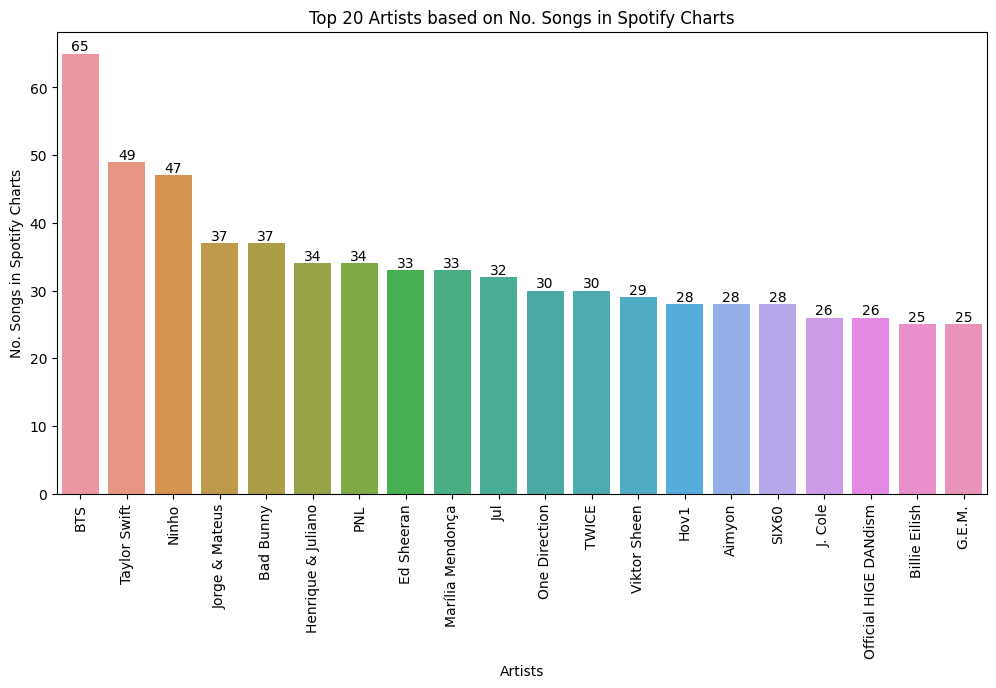

In [42]:
plt.figure(figsize=(12,6))

fig = sns.barplot(x = 'name_artist',
            y = 'count',
            data = top_20_artists_in_chart_df)

plt.xticks(rotation='vertical')

fig.set_xlabel('Artists')
fig.set_ylabel('No. Songs in Spotify Charts')
fig.set_title('Top 20 Artists based on No. Songs in Spotify Charts')
fig.bar_label(fig.containers[0])

plt.show()

From the correlation matrix below we can see that from our nine main audio features  only

* `acoustincness` and `energy`
* `loudness` and `acoustincness`
* `loudness` and `energy`
* `danceability` and `valence`

are moderately correlated. 

The most positive correlation is 0.7 between loudness and energy, which is very intuitive since 'louder' songs tend to evoke feelings like excitement and empowerment which increase energy. On the contrary, the most negative correlation of -0.67 is between acousticness and energy, which, similar loudness, is reasonable because songs that are more acoustic tend to be more laid-back and less energetic.

It is very convenient that not all of our features are correlated with each other because our results will not be affected by multicollinearity.

In [43]:
audio_features_matrix = final_tracks_artists_df[['danceability', 'energy',	'loudness',	
                                             'speechiness', 'acousticness',	'instrumentalness',
                                             'liveness', 'valence', 'tempo','duration_ms']]

corr_mat = round(audio_features_matrix.corr(),3)

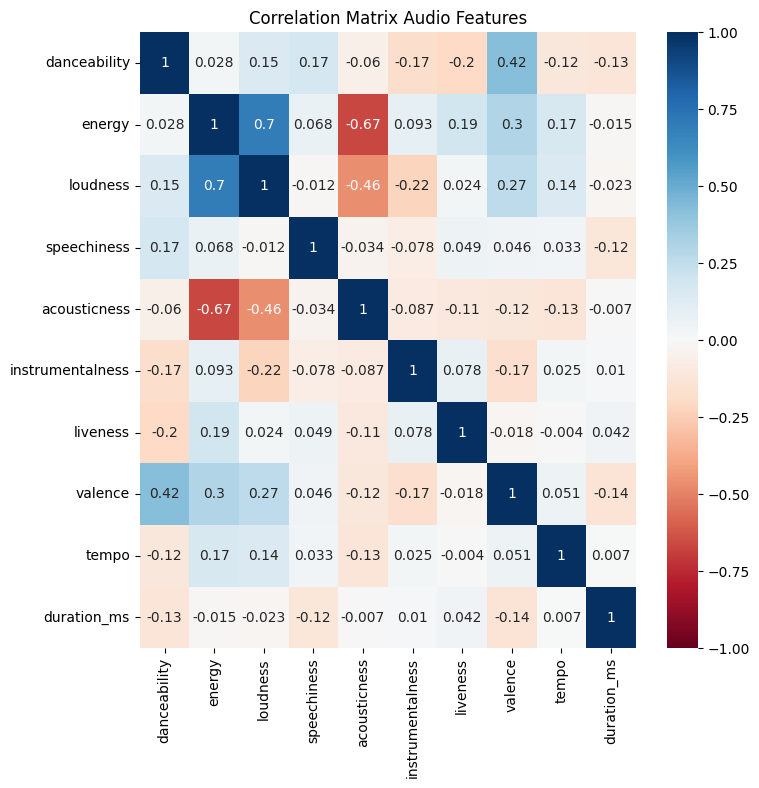

In [44]:

plt.figure(figsize = (8,8))

fig = sns.heatmap(corr_mat,
            annot = True,
            cmap = 'RdBu',
            vmin = -1,
            vmax = 1)

fig.set_title('Correlation Matrix Audio Features')

plt.show()

We decided to take a sample of 1000 tracks in order to reduce the time it will take the plot to run. We believed 1000 was a big enough sample size to get a clear understanding of the entire dataset.


By visually looking at the relationships between the different variables, we can attest that most variables are not related to each other. Yet, some interesting patterns show up with variables like `instrumentalness` and `speechiness`. For those two audio features, most of the data points are agglomerated in the value of zero. Even looking at their density plots, we see how there is a concentration of the distribution for `instrumentalness` and `speechiness` on the left side (right skew) where zero is. We decided to look at the variables closely and individually to decide what to do with these variables.

When we do the hue on `in_chart`, we see that the audio features all have the same distribution yet the only difference is that songs with `in_chart` 0 have a higher density overall which is just due to the fact that there are more songs that have not been in the charts overall in our dataset.

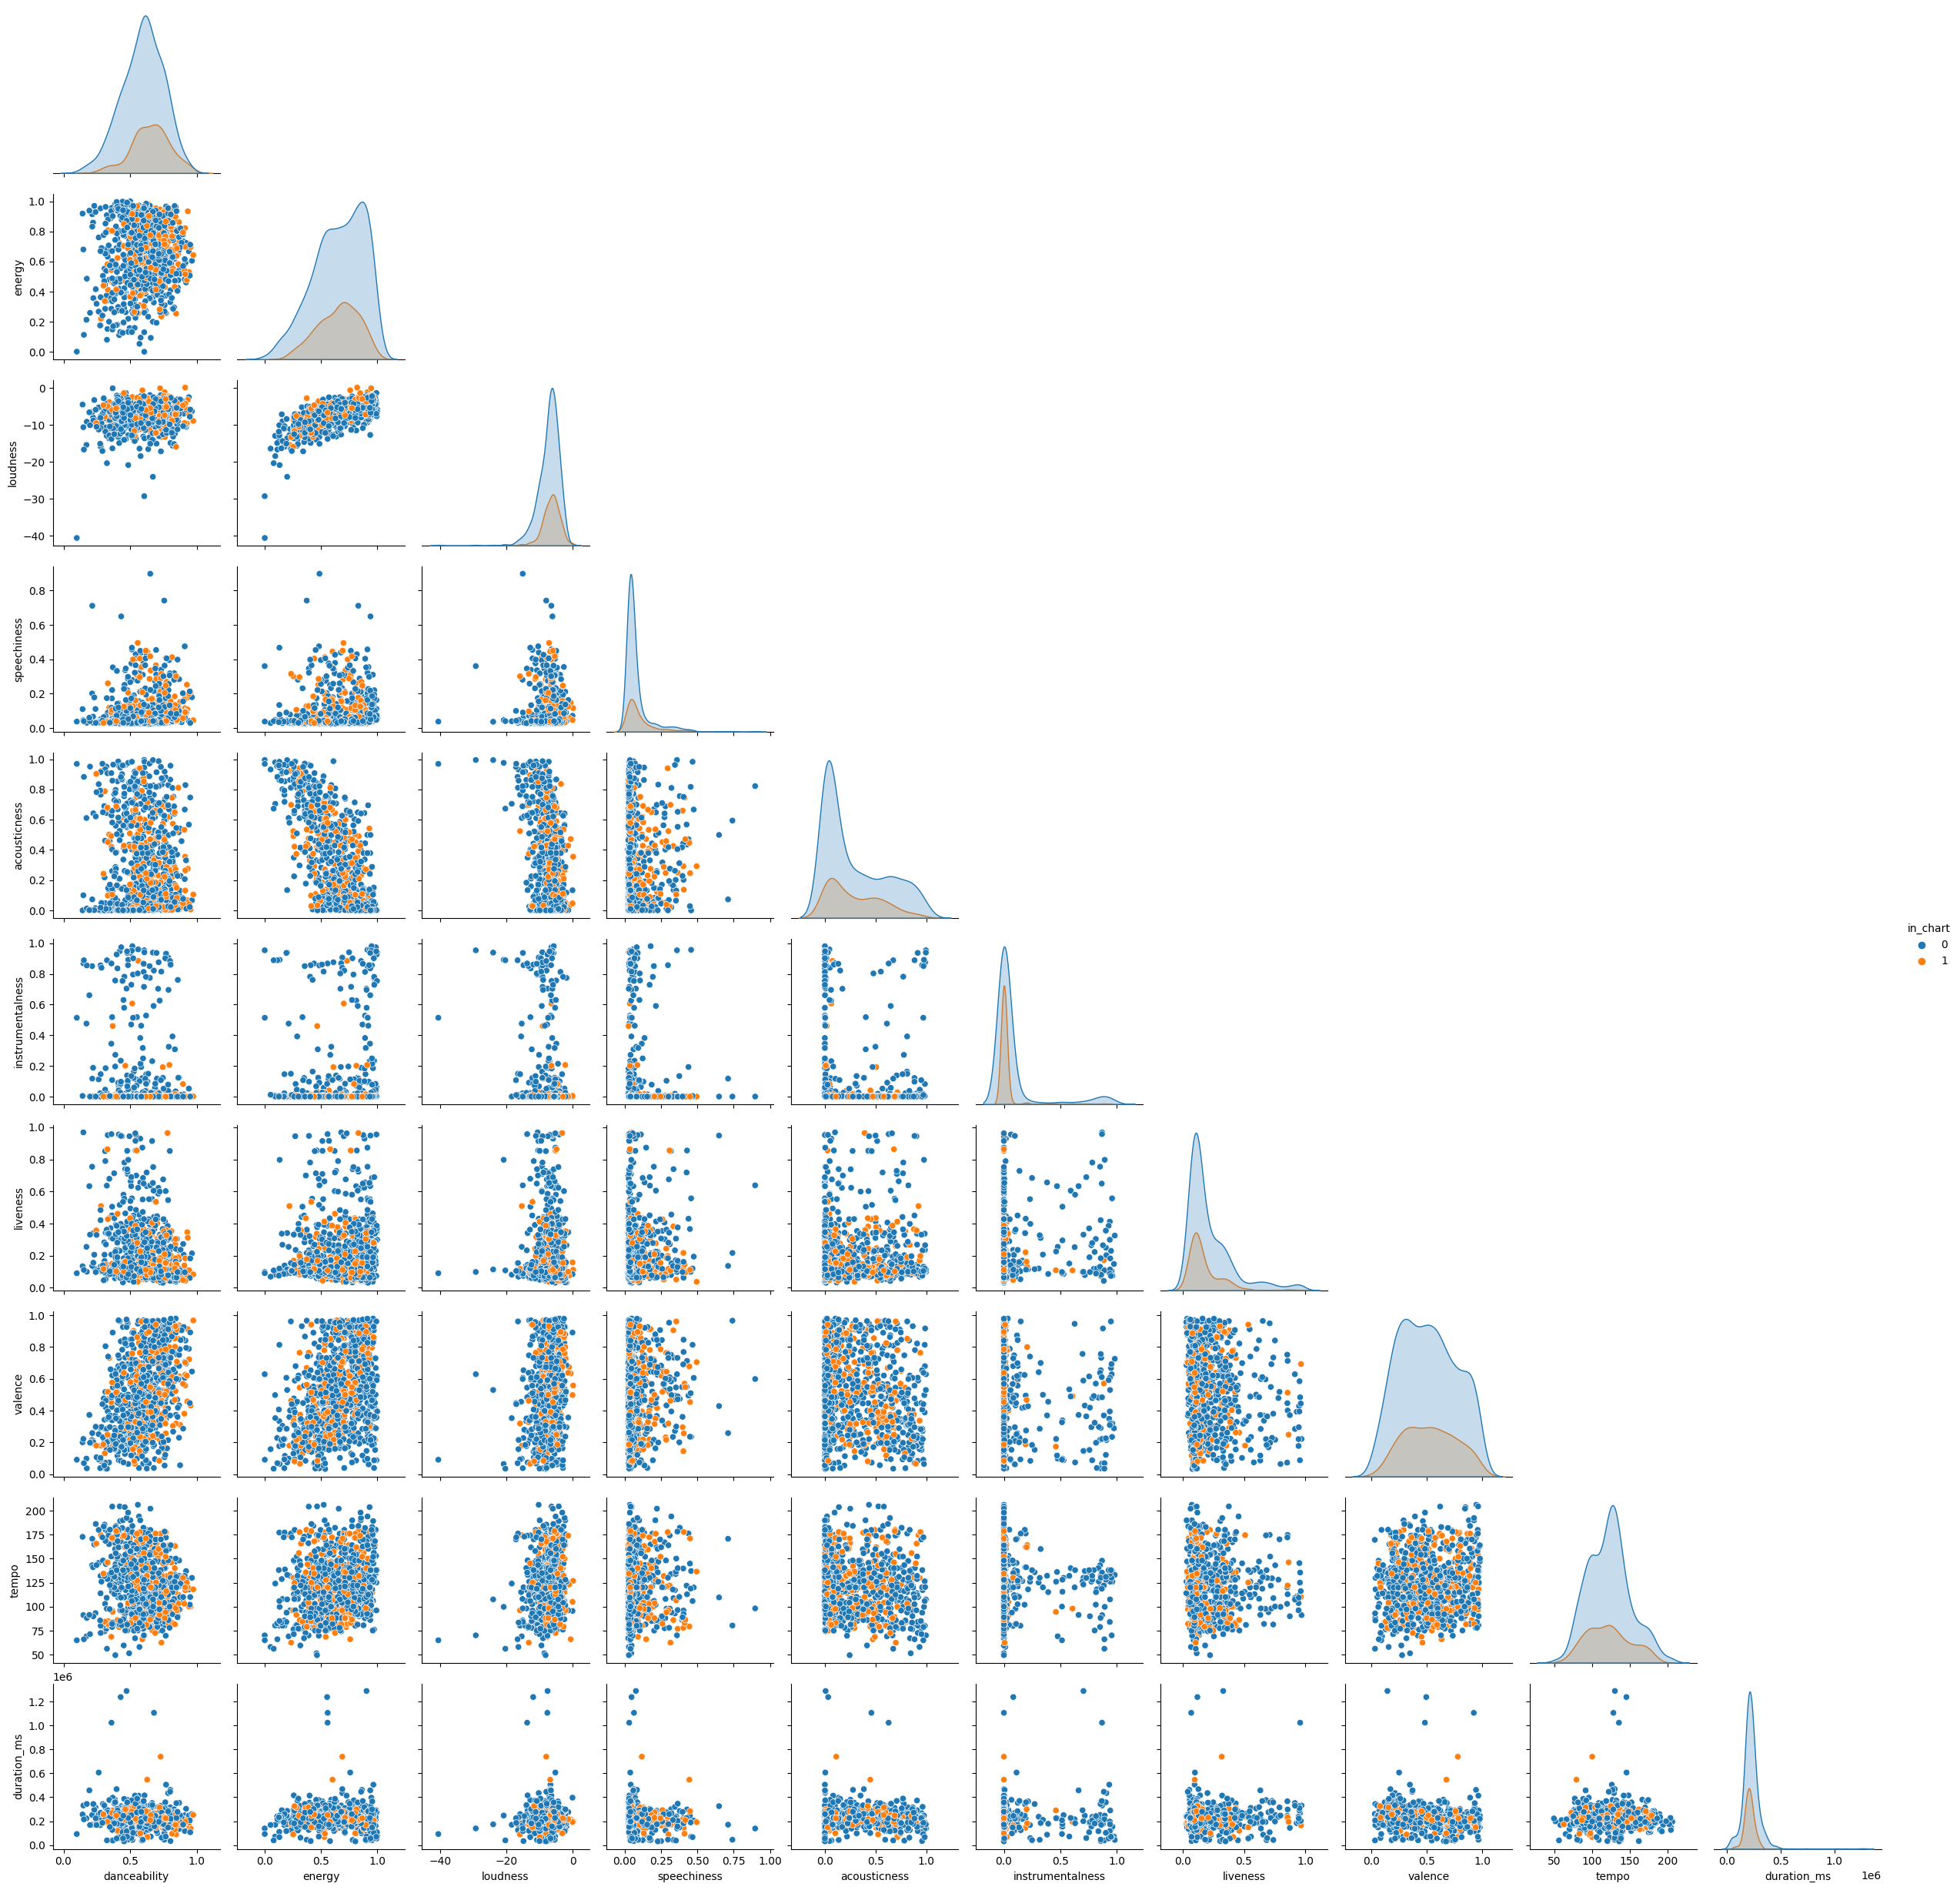

In [45]:
audio_features_df = final_tracks_artists_df[['danceability', 'energy',	'loudness',	
                                             'speechiness', 'acousticness',	'instrumentalness',
                                             'liveness', 'valence', 'tempo', 'duration_ms','in_chart']]

g = sns.pairplot(audio_features_df.sample(1000),
                 hue = 'in_chart',
                 diag_kind = 'kde',
                 corner = True,
                 diag_kws={'color':'black'})

## Looking Closely at Speechiness and Instrumentalness

### Speechiness

For `speechiness`, looking at both its density and the boxplot (removing outliers) we see that the variable has a median of ~0.05. This shows that while on average tracks have a `speechiness` value close to zero (despite the range extending to 1), their low `speechiness` level in most cases is not zero. So, it is still important to include this feature in our analysis. It also seems realistic that most songs are not entirely comprised of just spoken words with very little music so that is why in general songs have a low `speechiness` score.

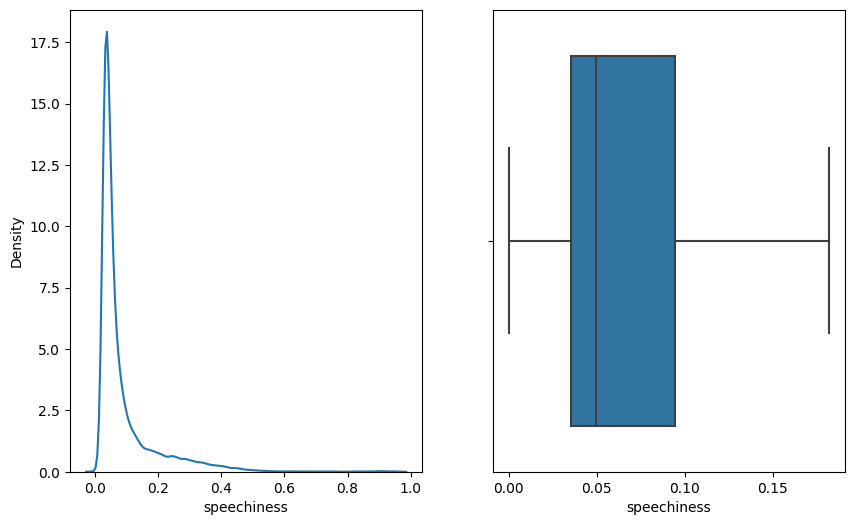

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(10,6))

sns.kdeplot(audio_features_df['speechiness'],
            ax= ax[0])

sns.boxplot(x = 'speechiness',
            data = final_tracks_artists_df,
            showfliers = False,
            ax= ax[1])

plt.show()

In [47]:
audio_features_df['speechiness'].describe()

count    137134.000000
mean          0.089855
std           0.099175
min           0.000000
25%           0.035300
50%           0.049400
75%           0.094200
max           0.958000
Name: speechiness, dtype: float64

### Instrumentalness

Unlike speechiness, instrumentalness has distribution that is centered approximately around 0. The median value of ~0 indicates that most tracks are not entirely comprised of just instrumentals and there are vocal elements in them. This corroborates our observations in speechiness where songs are unlikely to be entirely vocal since it is usual that tracks have a mix of the two components. Yet, it is interesting how there are no more values for both variables that lie in the middle of the scale, 0.5, since most songs are made to be a mix of both speechiness and instrumentalness. 

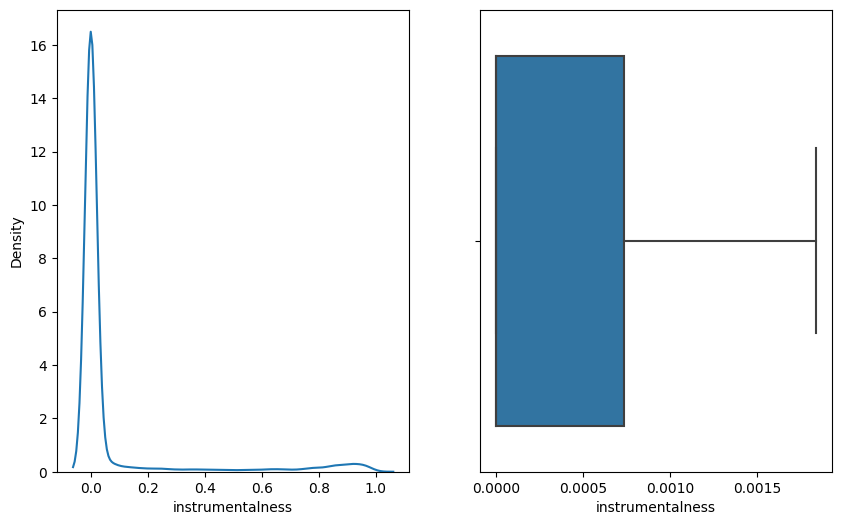

In [48]:
fig, ax = plt.subplots(1, 2, figsize=(10,6))

sns.kdeplot(audio_features_df['instrumentalness'],
            ax= ax[0])

sns.boxplot(x = 'instrumentalness',
            data = final_tracks_artists_df,
            showfliers = False,
            ax= ax[1])

plt.show()

In [49]:
audio_features_df['instrumentalness'].describe()

count    137134.000000
mean          0.072712
std           0.219182
min           0.000000
25%           0.000000
50%           0.000003
75%           0.000737
max           1.000000
Name: instrumentalness, dtype: float64

## Distribution of Valence throughout the years

We had the idea that given all of the issues that had been escalating in the world for the past 5+ years, it would be interesting to see how emotions, as measured by valence, have been changing from 2014 to 2020. These range of dates is also key to this since 2014 happened before Trump getting elected in 2016 and 2020 is when the COVID-19 pandemic happened, so emotions were undoubtely mixed in dates in this range. We would expect songs in 2014, 2016, and 2020 to have a lower `valence` score because it occured in pivotal moments (where 2014 was a great year in the 2010's for alternative music in the charts and grunge culture permeating pop culture at the time). Changes in culture definitely affect the way in which artists express their feeling in songs, which is why we expect drastic differences in `valence` throughout the years.

From the visual summary of valance in the 7 year period of 2014-2020, we see that there is no drastic change in the emotions conveyed in songs. Again, we should emphasize that while 2014 and 2016 were perhaps pivotal years for pop culture, this same culture is not lived by people in other countries whose charts are comprised of different songs and whose data we have included. Yet, it is surprising to see that 2020 was not overall more `negative`, lower valence, given that COVID-19 negatively affected everyone.

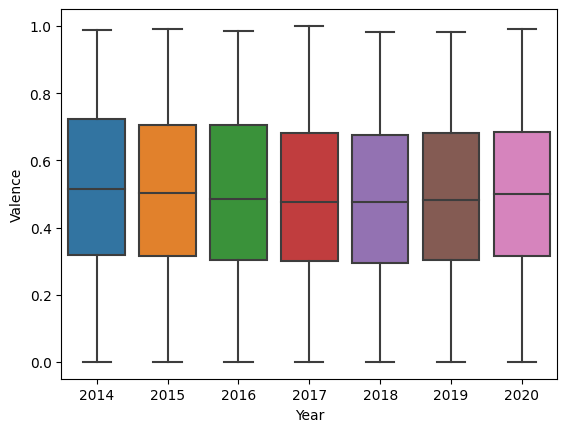

In [50]:
fig = sns.boxplot(x = 'release_year',
                  y = 'valence',
                  data = final_tracks_artists_df)

fig.set_xlabel('Year')
fig.set_ylabel('Valence')

plt.show()

## Distribution of Valence in Explicit vs. Non-Explicit Tracks 

We were also interested in knowing whether `valance` changed for songs that were explicit over songs that were not. We expected that songs that are explicit would overall have a lower `valence` since explicit lyrics are associated with emotions like anger.

The visual summary shows that explicit songs have a median valence that is smaller than for non-explicit songs. This aligns with our initial expectations. Yet, we wanted to go beyond just looking at the median for both groups and making a conclusion about the two groups.

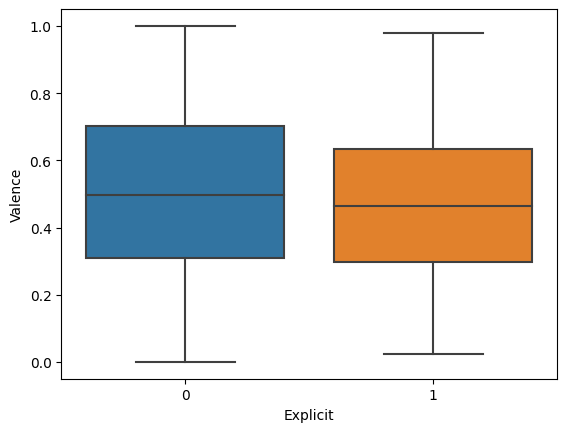

In [51]:
fig = sns.boxplot(x = 'explicit',
                  y = 'valence',
                  data = final_tracks_artists_df)

fig.set_xlabel('Explicit')
fig.set_ylabel('Valence')

plt.show()

### Hypothesis Testing

After visually seeing the slight difference in median `valence` values for explicit and non-explicit songs, we wanted to test the hypothesis that the mean `valence` of the non-explicit group is indeed greater than that of the explicit group.

In [52]:
valence_no_explicit = final_tracks_artists_df[final_tracks_artists_df['explicit'] == 0]['valence']
valence_explicit = final_tracks_artists_df[final_tracks_artists_df['explicit'] == 1]['valence']

t_stat, p_val = stats.ttest_ind(valence_no_explicit, valence_explicit, equal_var=True, alternative='greater')

print("t-statistic: ", t_stat)
print("p-value: ", p_val/2)

t-statistic:  17.94525339105868
p-value:  1.5801340480867478e-72


The very small p-value indicates that we reject the null hypothesis, in other words, the mean of non-explicit tracks is greater than the mean of explicit tracks. Again, a high `valence` indicates that a track presents more positive emotions so it could be argued that if a song has curse words, then the song might be perceived as less optimistic and happy. 

## Relationship between Speechiness and Danceability

Further, we also wanted to investigate whether songs that have more vocals are more danceable since it is normal to sing and dance to songs whose lyrics we find exciting.

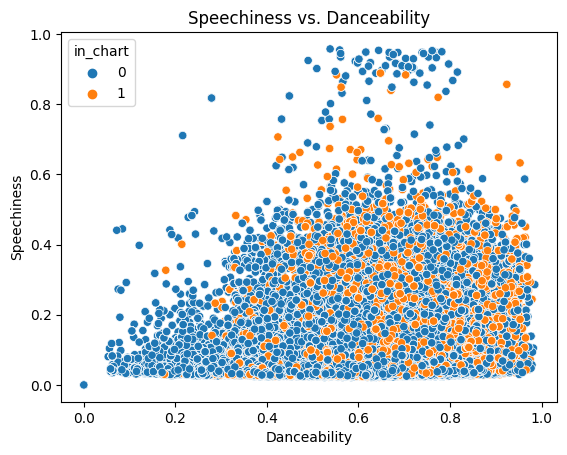

In [53]:
fig = sns.scatterplot(x = 'danceability',
                      y = 'speechiness',
                      hue = 'in_chart',
                      data = final_tracks_artists_df)

fig.set_xlabel('Danceability')
fig.set_ylabel('Speechiness')
fig.set_title('Speechiness vs. Danceability')

plt.show()

Fom this scatterplot we see that there is no clear pattern between `danceability` and `speechiness`. However, most tracks seem to be agglomerated below the 0.6 value for `speechiness`. Even when accounting for `in_chart`, we see that the colored points overlap throughout, so the relationship between speechiness and danceability is not different for songs that have and have not been in the charts.

## Relationship between Valence and Acousticness

We also thought that we could check whehter more acoustic songs had less valence since acoustic songs are more likely to be slow-paced and less joyful. Thus, we expected to see a negative relationship between the variables.

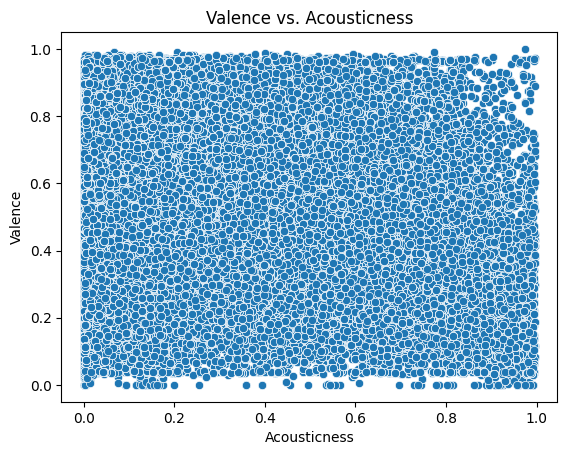

In [54]:
fig = sns.scatterplot(x = 'acousticness',
                      y = 'valence',
                      data = final_tracks_artists_df)

fig.set_xlabel('Acousticness')
fig.set_ylabel('Valence')
fig.set_title('Valence vs. Acousticness')

plt.show()

When we investigate at the relationship between `acousticness` and `valence`, there is no relationship at all. The values are spread throughout the entire scale for both variables, which suggests that acoustic and non-acoustic songs convey a wide range of emotions.

## Top 5 Genres

We are interested in exploring trends across the top 5 genres. We will do so applying a groupby and aggregating the `name_artist` column to obtain a count, and then sorting the values by this count column in descending order and keeping the top 5, and storing the values for the `genres` column as a list called `list_of_top_five_genres`. Since 24% of the songs were in the "other" genre, we will look at the top 6 categories to be able to examine the top 5 specific (non-other) genres.

In [55]:
list_of_top_five_genres = final_tracks_artists_df.groupby('genres', as_index = False)[['id_track']].count().\
                rename(columns = {"id_track":"Count"}).sort_values(by = 'Count', ascending = [False]).head(6)['genres'].to_list()
list_of_top_five_genres

['pop', 'other', 'rock', 'hip hop', 'rap', 'indie']

In [56]:
print('The Top 5 Genres (plus the "other" category):')

for i, genre in enumerate(list_of_top_five_genres):
  print(i+1, '. ',genre, sep = '')

The Top 5 Genres (plus the "other" category):
1. pop
2. other
3. rock
4. hip hop
5. rap
6. indie


Now that we know what the top 5 genres are (pop, rock, hip hop, rap, and indie), we will create a new dataframe called `final_df_top_five_genres` that contains rows with any of these `genres`. We will remove the "other" value from the `list_of_top_five_genres` in order to be able to focus on the specific top 5 genres.

In [57]:
list_of_top_five_genres = [genre for genre in list_of_top_five_genres if genre != 'other']
list_of_top_five_genres

['pop', 'rock', 'hip hop', 'rap', 'indie']

In [58]:
final_df_top_five_genres = final_tracks_artists_df[final_tracks_artists_df['genres'].isin(list_of_top_five_genres)]

### Explicit Songs in Top 5 Genres

We are interested in seeing whether there are different trends in the number of explicit songs across the top 5 genres, so we will apply a projection and store rows that have explicit songs in a dataframe called `test_explicit`, and then groupby `genres` and count the number of explict songs for each of the top 5 genres. We will then visualize the results through a bar plot.

As evident below, hip hop music has the largest number of explicit songs, followed by rap and pop music. Rock and indie music have the least number of explicit songs.

In [59]:
test_explicit = final_df_top_five_genres[final_df_top_five_genres['explicit'] == 1].groupby('genres', as_index = False).\
                  agg({'explicit':'count'}).rename(columns = {"explicit":"count"}).sort_values('count', ascending = False)

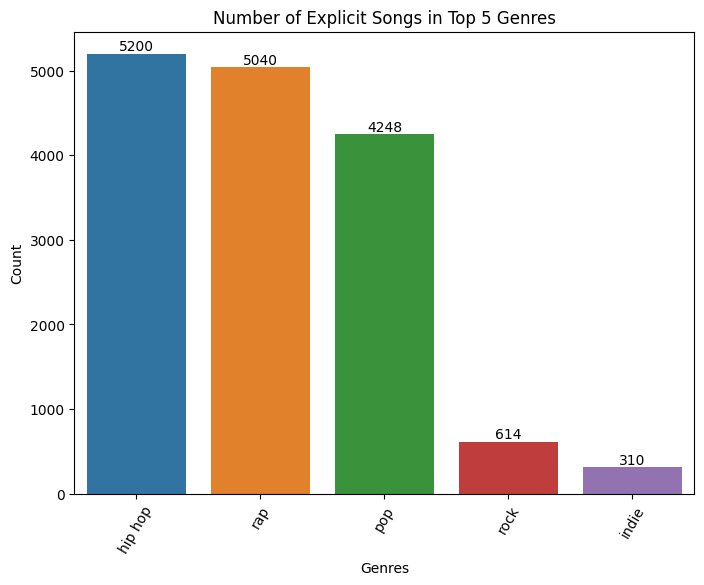

In [60]:
plt.figure(figsize=(8, 6))

fig = sns.barplot(data = test_explicit, x= "genres", y= "count", errorbar = None)

fig.set_xlabel('Genres')
fig.set_ylabel('Count')
fig.set_title('Number of Explicit Songs in Top 5 Genres')
plt.xticks(rotation=60)

fig.bar_label(fig.containers[0])

plt.show()

### Proportion of Explicit Songs in Top 5 Genres

In [61]:
prop_explicit_top_5_genres = final_df_top_five_genres.groupby('genres')[['explicit']].mean().reset_index().\
                                       rename(columns = {"explicit":"explicit prop"}).sort_values('explicit prop', ascending = False)

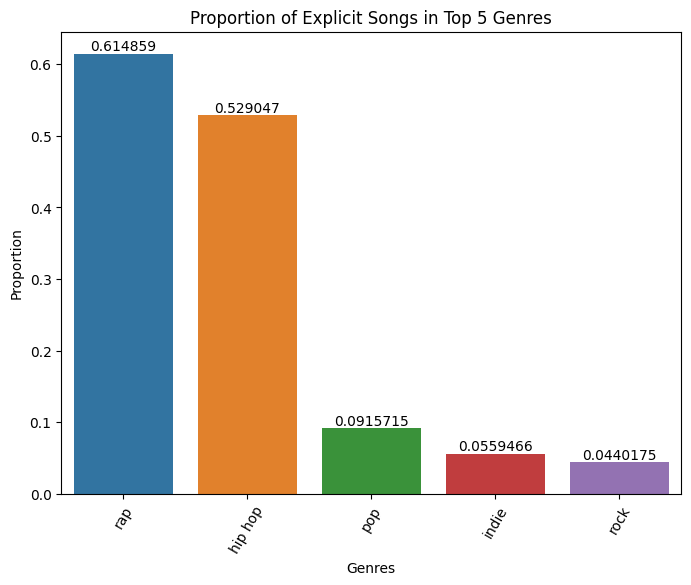

In [62]:
plt.figure(figsize=(8, 6))

fig = sns.barplot(data = prop_explicit_top_5_genres, x= "genres", y= "explicit prop", errorbar = None)

fig.set_xlabel('Genres')
fig.set_ylabel('Proportion')
fig.set_title('Proportion of Explicit Songs in Top 5 Genres')
plt.xticks(rotation=60)

fig.bar_label(fig.containers[0])

plt.show()

From this plot we see that even when looking at proportion instead of count, rap and hip hop still have the highest proportion of explicit songs, which aligns with our findings from our counting bar plot above.

### Number of In-Chart Songs in Top 5 Genres

We would like to explore possible differences in the number of songs that make it to the charts across the top 5 genres. To do so, we will create a `test_inchart` dataframe that includes only songs with `in_chart` values of 1, and groupby the `genres` column and count the number of songs. We will then plot a barplot to visualize this data.

As indicated by the barchart below, the pop music has the highest number of in-chart songs, followed by hip hop and rap music.

In [63]:
test_inchart = final_df_top_five_genres[final_df_top_five_genres['in_chart'] == 1].groupby('genres', as_index = False).\
                agg({'in_chart':'count'}).rename(columns = {"in_chart":"in_chart count"}).sort_values('in_chart count', ascending = False)

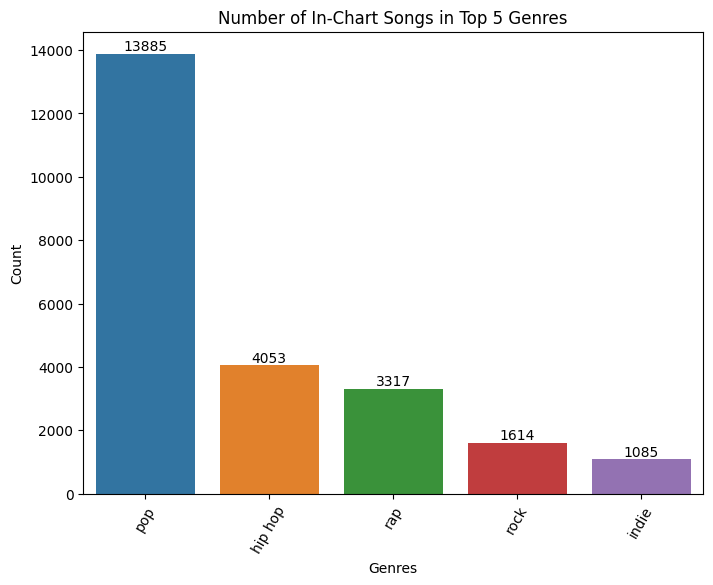

In [64]:
plt.figure(figsize=(8, 6))

fig = sns.barplot(data = test_inchart, x= "genres", y= "in_chart count", errorbar = None)

fig.set_xlabel('Genres')
fig.set_ylabel('Count')
fig.set_title('Number of In-Chart Songs in Top 5 Genres')
plt.xticks(rotation=60)

fig.bar_label(fig.containers[0])

plt.show()

### Proportion of In-Chart Songs in Top 5 Genres

However, we realize that these findings may not accurately reflect the likelihood of a song of a particular genre making it into the charts, since there are significantly more pop songs in our dataset in comparison to other genres. Therefore, we decided to create a similar plot but apply the `mean` aggregate function instead of `count`, to see the proportion of songs within each genre that make it into the charts.

As indicated by the barchart below, hip hop and rap actually have the highest proportion of songs making it into the charts, followed by pop, indie, and rock music.

In [65]:
test_inchart_percentage = final_df_top_five_genres.groupby('genres', as_index = False).agg({'in_chart':'mean'}).\
                            rename(columns = {"in_chart":"in_chart prop"}).sort_values('in_chart prop', ascending = False)

test_inchart_percentage['in_chart prop'] = test_inchart_percentage['in_chart prop'].apply(lambda x: np.round(x, 3))

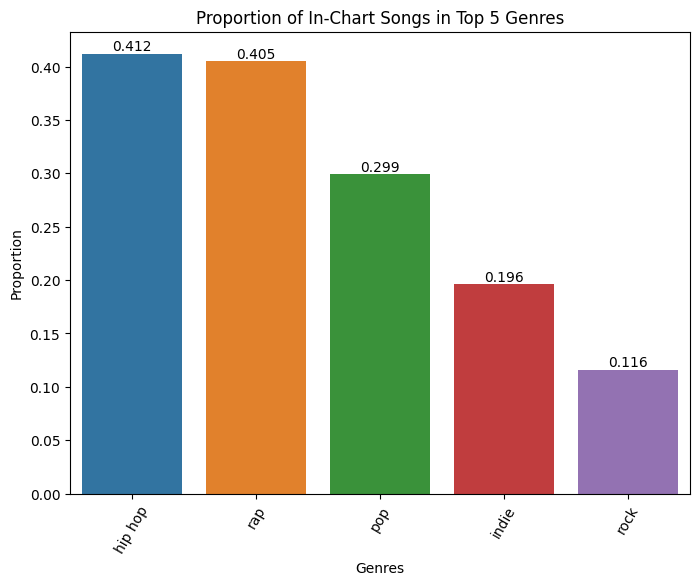

In [66]:
plt.figure(figsize=(8, 6))

fig = sns.barplot(data = test_inchart_percentage, x= "genres", y= "in_chart prop", errorbar = None)

fig.set_xlabel('Genres')
fig.set_ylabel('Proportion')
fig.set_title('Proportion of In-Chart Songs in Top 5 Genres')
plt.xticks(rotation=60)

fig.bar_label(fig.containers[0])

plt.show()

## Artist and Track Popularity  

We are also interested in exploring whether or not more popular artists are more likely to have more popular tracks. We do so below by creating a pairplot for the `popularity_track` and `popularity_artist` columns. As shown below, while the most popular tracks often come from the most popular artists, many popular artists have unpopular tracks, so this pattern does not always hold.

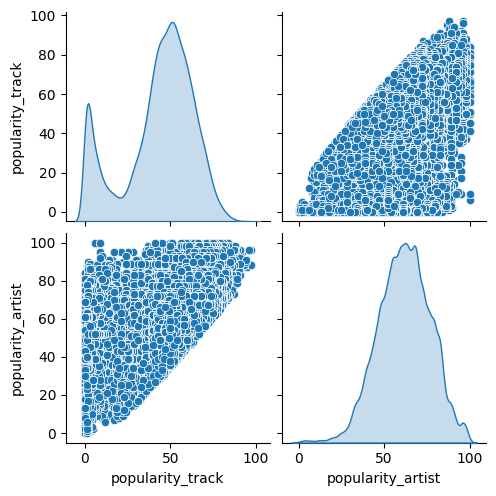

In [67]:
g = sns.pairplot(final_tracks_artists_df[['popularity_track','popularity_artist']],
                 diag_kind = 'kde')

## Track Popularity for Release Years (2014-2020)

We are interested in exploring whether or not the popularity of tracks differs according to their release year. We do so below through a line graph that plots the popularity of tracks for different release years. While the differences are not very large, we see a slight increase in the more recent years such as 2017-2020, from older years such as 2014-2016. The higher popularity of songs with more recent release years is likely due to more recent songs being streamed more often (which the `popularity` metric, as recorded by Spotify's algorithm, accounts for when calculating the score).

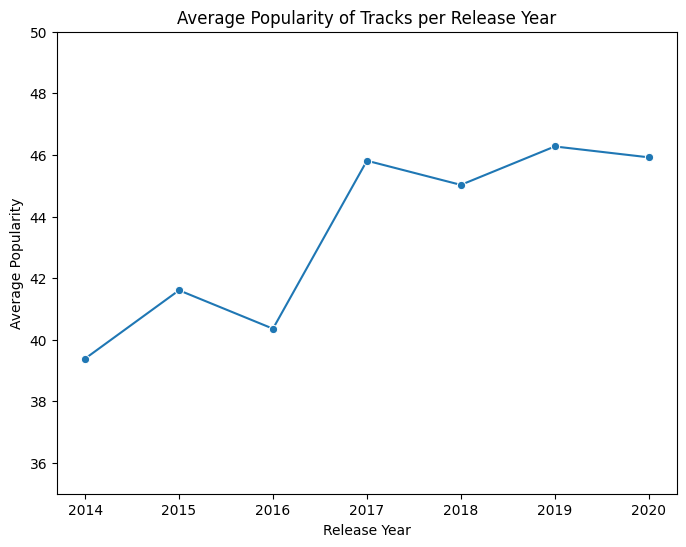

In [68]:
plt.figure(figsize=(8, 6))

fig = sns.lineplot(data = final_tracks_artists_df,
                   x= "release_year",
                   y= "popularity_track",
                   errorbar = None,
                   markers = True,
                   marker='o')

fig.set_xlabel('Release Year')
fig.set_ylabel('Average Popularity')
fig.set_title('Average Popularity of Tracks per Release Year')


plt.ylim([35, 50])

plt.show()

## Track Popularity vs. Liveness 

We would like to explore whether or not there is a relationship between having a live audience and a track's popularity. Below, we plot a scatter plot that visualizes the correlation between `liveness` and `popularity_track`. While the line of best fit indicates that increasing the likelihood of a live audience decreases a track's popularity, the data is fairly scattered, indicating that this correlation is not a strong one, as there are many songs with a low `liveness` score and a low `popularity_track` score as well.

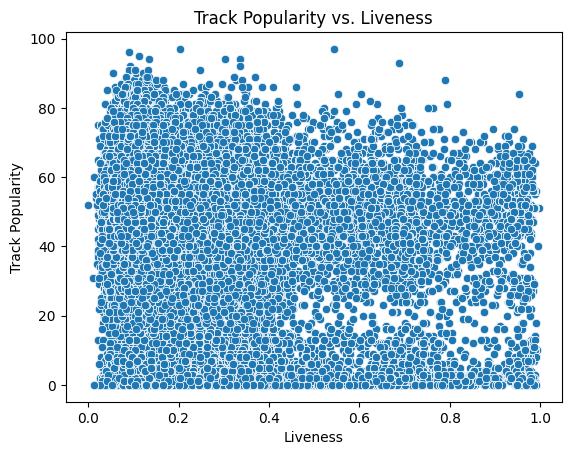

In [69]:
fig = sns.scatterplot(x = 'liveness',
                      y = 'popularity_track',
                      data = final_tracks_artists_df)

fig.set_xlabel('Liveness')
fig.set_ylabel('Track Popularity')
fig.set_title('Track Popularity vs. Liveness')

plt.show()

## Followers vs. Artist Popularity

We are interested in exploring the relationship between the popularity of an artist and the number of followers they have. Are more popularity artists always likely to have more followers? Is the number of followers a good indicator of an artist's popularity? Below, we create a scatter plot that visualize the relationship between the `popularity_artist` and `followers` columns. 

As indicated by the scatter plot, the artists with the highest popularity scores are more likely to have more followers. However, these differences only emerge at the highest popularity scores. There is little difference between the number of followers that artists with a poularity score of 50 have vs those with a popularity score of 25. Therefore, this suggests that the number of followers is not always the best measure of popularity.

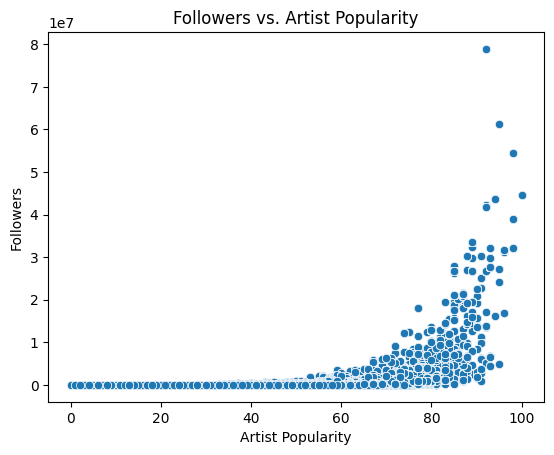

In [70]:
fig = sns.scatterplot(x = 'popularity_artist',
                      y = 'followers',
                      data = final_tracks_artists_df)

fig.set_xlabel('Artist Popularity')
fig.set_ylabel('Followers')
fig.set_title('Followers vs. Artist Popularity')

plt.show()

## Distribution for Track and Artist Popularity

We would like to explore the distribution of track and artist popularities within the dataset. We do so below by creating a box and whiskers plot for the `popularity_track` and `popularity_artist` columns. As indicated by the plot, there seems to be many outliers for the `popularity_artist` scores, specifically in the lower range, indicating that there are many unpopular artists. However, most scores tend to be centrally located between 50 and 70. There are less outliers for the `popularity_track` scores, and they to be more centralized. However, the `popularity_track` scores seem to be generally lower than the `popularity_artist` scores, with most values lying in the 35-60 range.

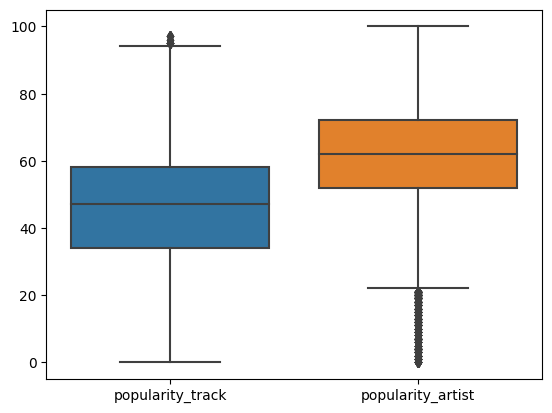

In [71]:
sns.boxplot(final_tracks_artists_df[['popularity_track','popularity_artist']])
plt.show()

## Averages throughout the years

First, we need to group the data by years and take the mean of all numeric features. 

In [72]:
avg_through_years = final_tracks_artists_df.groupby('release_year', as_index = False).mean()

<ipython-input-72-eb71bd070555>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_through_years = final_tracks_artists_df.groupby('release_year', as_index = False).mean()


### Plot for features in range between 0 and 1

For those variables that are rated from 0 to 1 (continuous), we can make a line plot to see their changes over the years. 


*   `danceability`: On average, released music is becoming more danceable.
*   `energy`: On average, music is becoming less energized.
*   `speechiness`: On average, released music has slightly more spoken words present in the tracks. 
*   `acousticness`: On average, released music is similarly acoustic as previous years. 
*   `instrumentalness`: On average, released music has slightly less no vocals.
*   `liveness`: On average, released music has mantain its likelihood of an audience being present during the recording.
*   `valence`: On average, released music has mantain musical positiviness of the track.

Overall, the only ones demonstrating some changes are `danceability`, `energy`, `speechiness`, and `instrumentalness`. 

1.   These last two are part of the same change. Their contrary directions make sense, since they are opposites.  
2.   As for `danceability` and `energy`, one would think they would go to the same direction. However, throughout the years, they have got closer and closer. 

This may mean tracks with danceability that requires less energy are becoming more popular or popular tracks are mixing or including elements from more danceable, less energized tracks. 
 
 






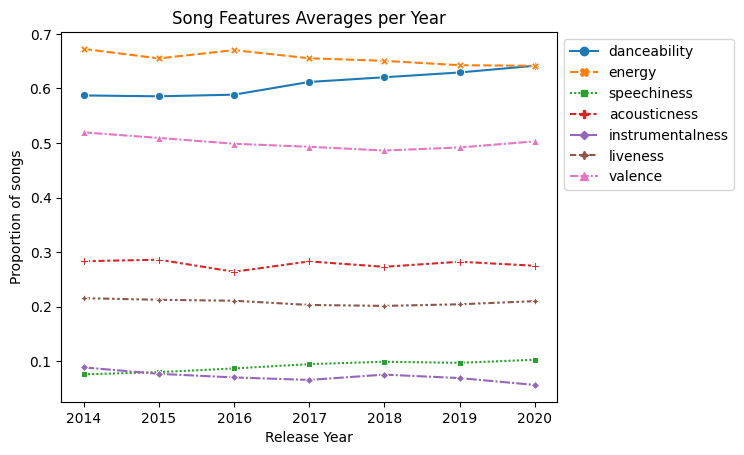

In [73]:
sns.lineplot(data=avg_through_years[['danceability','energy','speechiness', 'acousticness', 'instrumentalness', 'liveness','valence']],
             markers = True,
             marker = 'o')
x_ticks = ['2014','2015','2016','2017','2018','2019','2020']
plt.xticks([0,1,2,3,4,5,6], x_ticks)
plt.xlabel('Release Year') 
plt.ylabel('Proportion of songs') 
plt.title("Song Features Averages per Year")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

### Plot for binary variables

To avoid mixing continuous variables with categorical variables, we can make a separate plot for `in_chart` and `explicit` columns.



*   `in_chart`: Throughout the years, there are more songs in the charts (more songs where in_chart == 1, increasing the average). This means that in 2014, there was a smaller selection of songs charting, and in 2020, a bigger selection of songs have entered the charts at some point. A possible reason explored in [this New York Times Opinion (*Why songs of the Summer sound the same*)](https://www.nytimes.com/interactive/2018/08/09/opinion/do-songs-of-the-summer-sound-the-same.html) is that top Summer songs in late 2000s and early 2010s were very similar in their features. However, in 2018, they found that top Summer songs's feature metrics varied more, meaning there weren't the same similar songs charting for a long time (not allowing other ones to chart), but a more diverse group of songs updating the chart top positions more often.     
*   `explicit`: There has been a jump of overall proportion of songs with explicit lyrics per year between 2016 and 2017. However, the overall proportion of explicit songs per year has been maintain since 2017.



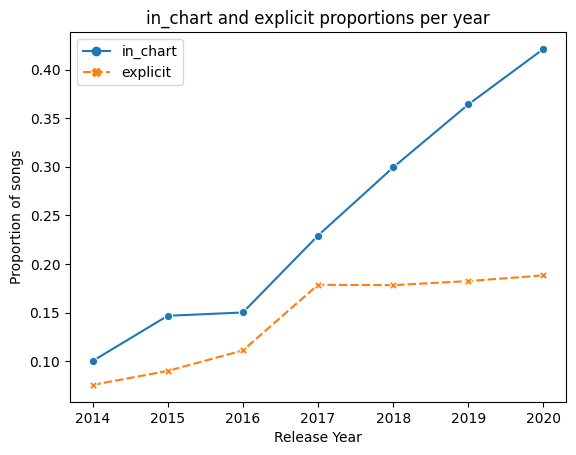

In [74]:
sns.lineplot(data=avg_through_years[['in_chart','explicit']], markers = True, marker = 'o')
x_ticks = ['2014','2015','2016','2017','2018','2019','2020']
plt.xticks([0,1,2,3,4,5,6], x_ticks)
plt.xlabel('Release Year') 
plt.ylabel('Proportion of songs') 
plt.title("in_chart and explicit proportions per year");

### Duration throughtout the years

In recent years, we have read that songs have been decreasing their duration time ([this article explains why](https://www.billboard.com/pro/songs-getting-shorter-tiktok-streaming/)). Some of the main reasons are TikTok and Streaming.

With the data, we have found that this is true. From the overall data of songs, the average duration per year has been declining, with the exception of 2019.

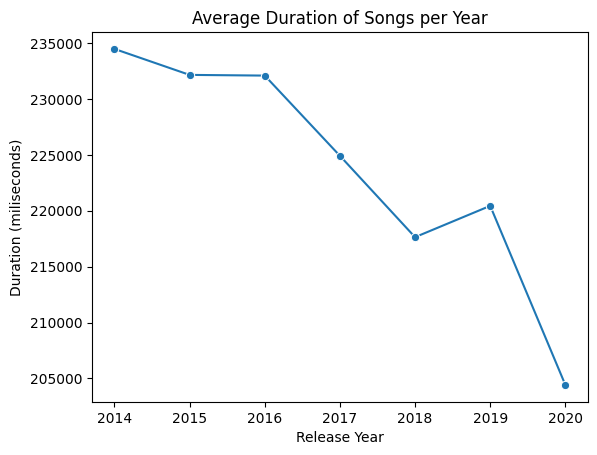

In [75]:
sns.lineplot(data=avg_through_years,
             x='release_year',
             y='duration_ms',
             markers = True,
             marker = 'o')

plt.xlabel('Release Year') 
plt.ylabel('Duration (miliseconds)') 
  
plt.title("Average Duration of Songs per Year");

## Map Plot

We wanted to look at the different country charts and investigate what artists have had the most songs that have gotten into the charts in the selected years. This is important because we can make recommendations to artists on what countries their songs get into the charts and potentially help them make decisions on where they could tour or even expand their music.

Similar artists could also understand the demographics that listen to their type of music and perhaps cater to those markets.

In [76]:
import plotly
import plotly.express as px

In [77]:
tracks_artists_countries_in_chart = charts_tracks_artists_df[(charts_tracks_artists_df['in_chart'] == 1) & 
                                                             (charts_tracks_artists_df['country'] != 'global')]

map_charts = tracks_artists_countries_in_chart.drop_duplicates(['track_id', 'name_artist', 'country'])

map_charts = map_charts[['country', 'name_artist', 'name_track']]                                                             

In [78]:
!pip install pycountry
import pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 57.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681847 sha256=de59beae218dff74a02d5978ebfbc95d707e1442cfa3763cd6daf0207f13764e
  Stored in directory: /root/.cache/pip/wheels/47/15/92/e6dc85fcb0686c82e1edbcfdf80cfe4808c058813fed0baa8f
Successfully built pycountry


In [79]:
list_alpha_2 = [i.alpha_2 for i in list(pycountry.countries)]

def country_flag(df):
    if (len(df['country'])==2 and df['country'] in list_alpha_2):
        return pycountry.countries.get(alpha_2=df['country']).name

def do_the_map(name):
  artist_n = name
  map_to_use = map_charts[map_charts['name_artist'] == artist_n]
  geomap = map_to_use[['country','name_track']]
  geomap['country'] = geomap['country'].str.upper()
  geomap = geomap.groupby('country').count()
  geomap.reset_index(inplace=True)
  
  
  geomap['country_name']=geomap.apply(country_flag, axis = 1)
  fig = px.choropleth(data_frame = geomap, locations = "country_name", 
                    locationmode = 'country names',color = "name_track", hover_name = "name_track", 
                    color_continuous_scale = px.colors.sequential.tempo, labels = {'name_track': 'Quantity'},
                    title = artist_n +' songs charted each country')
  
  fig.show()

### Countries where Bad Bunny Songs have charted

In [80]:
do_the_map("Bad Bunny")

<ipython-input-79-05c2b5b27bde>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geomap['country'] = geomap['country'].str.upper()


For this map we chose to Bad Bunny, which shows the countries where his music has charted for multiple times with a maximum of 37 songs charted in Spanish-speaking countries, such as Spain, Nicaragua, Chile, Paraguay, and Dominican Republic.

This makes sense since Bad Bunny is a Spanish-speaking artist that during the period of the data has received many awards and mentions for his musical work in Latin American and American music award shows.

### Countries where Lady Gaga Songs have charted 

In [81]:
do_the_map("Lady Gaga")

<ipython-input-79-05c2b5b27bde>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



For this map, we chose Lady Gaga, which shows that, during the 2014-2020 period, she had a maximum of 4 songs in the charts. This makes sense since she had few releases compared to late 00s/early 2010s. In some European countries, however, despite her not having hit songs in that period, some of her songs still charted.

### Countries where BTS Songs have charted

In [82]:
do_the_map("BTS")

<ipython-input-79-05c2b5b27bde>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



BTS is an example of an international sensation of a non-American act. During the period 2014-2020, they have charted in every continent with a maximum of 63 (Japan). The map also demonstrates that the South Korean boy band is bigger in East Asian countries, which makes sense since they are culturally closer. 

They have a growing fanbase in the Americas. This same group of countries is known for being open to new sounds and genres ([article 1](https://www.loudlab.org/blog/three-spotify-myths-confirmed-by-2021-fan-study/) and [article 2](https://fanstudy.byspotify.com/edition/reach)). Therefore, there is an opportunity for more k-pop groups to grow in that region.

# Models

## Regression – Predicting Track Popularity

### Linear Regression

We wanted to investigate potential predictors for the **popularity of a track.** Thus, we decided to build a Linear Regression model using numeric data because we wanted to make a prediction of a continuous variable (`popularity_track`) and we also wanted to start off with the simplest model. Thus, we defined the dependent variable as `popularity_track` and independent variables as the audio features of interest as well as popularity metrics for the artist of a track.

In [83]:
y = final_tracks_artists_df['popularity_track']

X = final_tracks_artists_df[['followers', 'popularity_artist', 'duration_ms', 'danceability',
                            'energy', 'loudness', 'speechiness', 'acousticness',
                            'instrumentalness', 'liveness', 'valence', 'tempo']]

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [86]:
linear = LinearRegression()
linear.fit(X_train, y_train)

predictions = linear.predict(X_test)

print('R2:', r2_score(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

R2: 0.3974320218054317
MSE: 253.67944836946137
RMSE: 15.927317676541188


The $R^2$ value of ~40% signifies that the model is explaining a moderate amount of variability in the dependent variable. This also means that ~60% of the variability in the dependent variable cannot be explained by the independent variables included in the model. Therefore, it is possible that other factors not included in the model could be influencing the dependent variable as well.

Additionally, the MSE, which measures the average squared difference between the predicted values and the actual values from the regression model, is 253. Given that the scale of `popularity_track` is 0 to 100, this is MSE value is relatively high. From this we get that our regression model is not accurately predicting the dependent variable and that there is a large amount of variability in the data that is not being captured by the model. The RMSE again reflects the poor predicting ability of the model. 

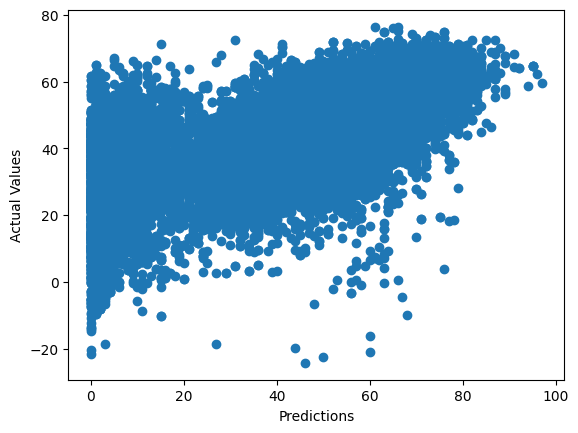

In [87]:
plt.figure(dpi=100)
plt.scatter(y_test, predictions)

plt.ylabel('Actual Values')
plt.xlabel('Predictions')

plt.show()

This plot shows how our model is not making accurate predictions. If it were, we would be seeing the cloud of points follow a 45 degree line. So, we are going to be trying different techniques to improve our model in terms of MSE and RMSE such as PCA and Ridge and LASSO Regularizations.

#### Scaling

Since PCA and Ridge and LASSO Regularizations are not scale invariant, we have to scale the data. 

In [88]:
from sklearn.decomposition import PCA

scaler = StandardScaler()

scaler.fit(X_train)

scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

#### Ridge Regularization

Ridge Regularization deals with overfitting by penalizing the model and making the coefficients of variables that are not as significant go towards zero. 

In [89]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(scaled_X_train, y_train)

predictions = ridge.predict(scaled_X_test)

print('R2:', r2_score(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

R2: 0.3974320222418537
MSE: 253.6794481857289
RMSE: 15.927317670773347


In theory, after applying regularization our MSE should either go down or stay the same. After implementing Ridge, we find that the MSE is still 253, which indicates that our model has not improved. We will try going for LASSO to see if the MSE changes.

#### LASSO Regularization

LASSO regularization deals with overfitting by penalizing the model and shrinking the less important feature's coefficient to zero.

In [90]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.1)
lasso.fit(scaled_X_train, y_train)

predictions = lasso.predict(scaled_X_test)

print('R2:', r2_score(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

R2: 0.3970533724050582
MSE: 253.83885871731948
RMSE: 15.932321196778563


Unfortunately, LASSO regularization with a penalty factor of 0.1 gives the same MSE value as the model without regularization. In this case, we used hyperparameter tuning to pick the value of 0.1 for $\alpha$ because we found that gave us the lowest MSE.

#### PCA

To reduce dimensions of the data, we will use Principal Component Analysis or PCA.  

In [91]:
pca = PCA(n_components=scaled_X_train.shape[1])
pca.fit(scaled_X_train)

PCA(n_components=12)

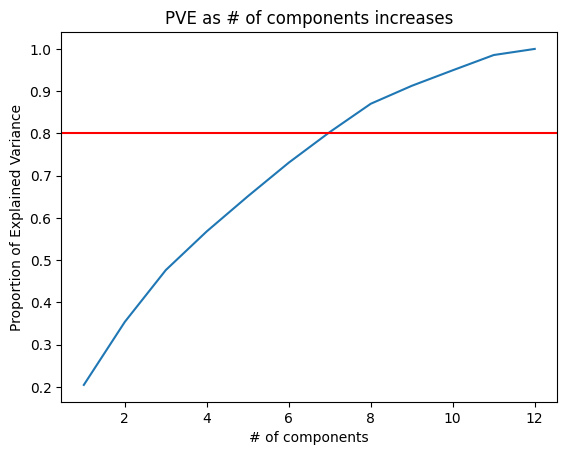

In [92]:
from sklearn.decomposition import PCA

explained_variance_ratios = pca.explained_variance_ratio_

cum_evr = np.cumsum(pca.explained_variance_ratio_)

plt.plot(np.arange(1, 13), cum_evr)
plt.axhline(y = 0.8, color = 'r', linestyle = '-')
plt.xlabel("# of components")
plt.ylabel("Proportion of Explained Variance")
plt.title("PVE as # of components increases")

plt.show()

In [93]:
pca = PCA(n_components=7)

pca.fit(scaled_X_train)

X_train_pca = pca.transform(scaled_X_train)

X_test_pca = pca.transform(scaled_X_test)

In [94]:
clf_pca = LinearRegression()

clf_pca.fit(X_train_pca, y_train)

y_pred = clf_pca.predict(X_test_pca)

print('R2:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

R2: 0.3405283427577639
MSE: 277.6357394990642
RMSE: 16.662404973444385


With PCA, our linear regression model had a lower $R^2$ value, ~34%, and an increase in the MSE, to 277, which indicates that applying PCA also did not help improve the predictability of our model.

Ridge and LASSO Regularization and PCA in theory would have helped in getting a better model by reducing overfitting but this was not the case, which might have happened because those techniques actually made us lose information. So, the model perhaps overfits less after using those techniques but overall makes a worse prediction. This may indicate that our data is naturally noisy and that there are perhaps other factors that are difficult to capture in a linear regression model.

Overall, based on the really high MSE (high bias) and moderate $R^2$ value, we can conclude that `popularity_track` is not linear with respect to the audio features we decided to use. Since predicting `popularity_track` is not our main goal we will leave exploring other predictive models for the popularity of a track for another project.

## Classification – Classifying tracks that get into the Spotify Charts

We will now focus on the main objective of the project which is to try to predict whether or not a song makes it into the charts by classifying it based on their audio features and artist metrics.

### One-hot Encoding

Since we reduced the number of distinct genres to only include 18 unique genres, including the 'other' category, we will one-hot encode them to be able to use their numeric representation as input to our models. Since we have reduced significantly the number of genres we have, this will not enlarge our dataset by so many columns.

In [95]:
dummy_df = pd.get_dummies(final_tracks_artists_df['genres'])
final_df_one_hot = pd.concat([final_tracks_artists_df.drop(columns = ['id_artist','id_track','name_track','name_artist','release_date','genres']), dummy_df], 
                             axis = 1)

### Logistic Regression

Since our goal is to classify songs into whether they have entered charts or not, we are going to use a binary classifier. Logistic Regression allows us to use a model that works with a binary dependent variable.


In [96]:
label = final_df_one_hot['in_chart']
features = final_df_one_hot.drop(columns = ['in_chart'])

First, we are going to try out Logistic Regression without PCA or any regularizations to establish a baseline performance for our model.

In [97]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size = 0.2)

In [98]:
from sklearn.linear_model import LogisticRegression
import sklearn.metrics

logreg = LogisticRegression(max_iter = 10000)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

accuracy_testing = accuracy_score(y_test, y_pred)

accuracy_training = accuracy_score(y_train, logreg.predict(X_train))

In [99]:
print('The testing accuracy score of the Logistic Regression Model:', accuracy_testing)

The testing accuracy score of the Logistic Regression Model: 0.7661793123564371


In [100]:
print('The training accuracy score of the Logistic Regression Model:', accuracy_training)

The training accuracy score of the Logistic Regression Model: 0.766897280939229


The model displayed a moderate performance with an accuracy score of ~76% for the training data. It is not terrible, but it is also not great. So, we will be using PCA reduce the number of features and simplify the model to improve its performance.

#### PCA

In [101]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()

scaler.fit(X_train)

scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

pca = PCA(n_components=scaled_X_train.shape[1])

pca.fit(scaled_X_train)

PCA(n_components=36)

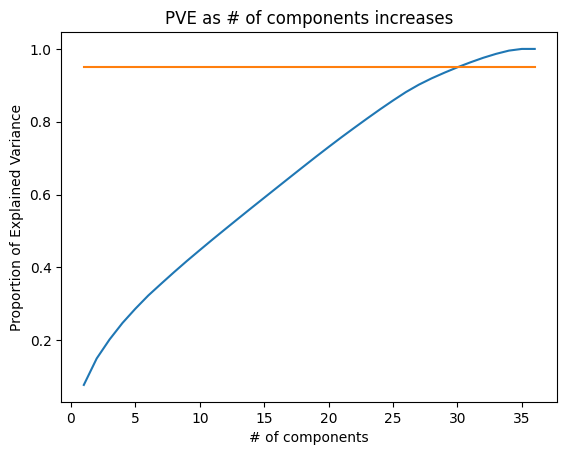

In [102]:
plt.plot(np.arange(1, 37), np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.arange(1, 37), [0.95]*36)
plt.xlabel("# of components")
plt.ylabel("Proportion of Explained Variance")
plt.title("PVE as # of components increases")
plt.show()

From the PVE plot we see that the appropriate number of PC's to use is 30. However, it is important to keep in mind that using a large number of components can make our model more complex and potentially overfit the data.

In [103]:
pca = PCA(n_components=30)

pca_X_train = pca.fit_transform(X_train)
pca_X_test = pca.transform(X_test)

In [104]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter = 10000)

logreg.fit(pca_X_train, y_train)

y_pred = logreg.predict(pca_X_test)

accuracy_testing = accuracy_score(y_test, y_pred)

accuracy_training = accuracy_score(y_train, logreg.predict(pca_X_train))

In [105]:
print('The testing accuracy score of the Logistic Regression Model with PCA:', accuracy_testing)

The testing accuracy score of the Logistic Regression Model with PCA: 0.6180770773325555


In [106]:
print('The training accuracy score of the Logistic Regression Model with PCA:', accuracy_training)

The training accuracy score of the Logistic Regression Model with PCA: 0.616952427830494


The model displayed a lower accuracy score of ~62% in contrast to the score of the model without using PCA which was ~76%. This could have happened because the PC's selected by PCA did not capture enough of the important information from the original features or because the reduction in dimensionality actually led to a loss of information.

While we see that the model has an accuracy score that is similar for both testing and training data, thus we are not overfitting the data, we still want to apply regularization and look out for any potential improvements.

#### LASSO Regularization

In [107]:
logreglasso = LogisticRegression(penalty='l1', solver='liblinear', C=0.5)

logreglasso.fit(X_train, y_train)

y_pred = logreglasso.predict(X_test)

accuracy_testing = accuracy_score(y_test, y_pred)

accuracy_training = accuracy_score(y_train, logreglasso.predict(X_train))

In [108]:
print('The testing accuracy score of the Logistic Regression Model with LASSO Regularization:', accuracy_testing)

The testing accuracy score of the Logistic Regression Model with LASSO Regularization: 0.7775914245086958


In [109]:
print('The training accuracy score of the Logistic Regression Model with LASSO Regularization:', accuracy_training)

The training accuracy score of the Logistic Regression Model with LASSO Regularization: 0.7756296316552271


After applying LASSO regularization we found the accuracy score to be higher than that of the baseline model by ~1%. This is somewhat better but there is definitely room for improvement. We will next look at Ridge Regularization on our logistic model

#### Ridge Regularization

In [110]:
logregridge = LogisticRegression(penalty='l2', solver='liblinear', C=0.5)

logregridge.fit(X_train, y_train)

y_pred = logregridge.predict(X_test)

accuracy_testing = accuracy_score(y_test, y_pred)

accuracy_training = accuracy_score(y_train, logregridge.predict(X_train))

In [111]:
print('The testing accuracy score of the Logistic Regression Model with Ridge Regularization:', accuracy_testing)

The testing accuracy score of the Logistic Regression Model with Ridge Regularization: 0.7657053268676851


In [112]:
print('The training accuracy score of the Logistic Regression Model with Ridge Regularization:', accuracy_training)

The training accuracy score of the Logistic Regression Model with Ridge Regularization: 0.7663047936777052


For Ridge regularization, we again see a similar accuracy score from the baseline model and the model with LASSO. Since we know that the model is not overfitting, by looking at the testing and training accuracy scores, we have concluded that this is as good as it is going to get with logistic regression. For this reason, we will try using Random Forest to see if we get better predictions.

### Random Forest

We would like to proceed with Random Forest because it reduces overfitting by using randomness since Random Forest randomly selects subsets of features used in each data sample. In our case, we want to classify songs on whether they have been in the charts or not. We decided to go with this over Decision Trees because Random Forest because it builds multiple trees and averages them out to get a more accurate prediction.

In [113]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(features, label, test_size = 0.2)

In [114]:
y_train_rf.value_counts()

0    84047
1    25660
Name: in_chart, dtype: int64

If we set max_depth to a small value can improve the generalization performance of our model by reducing overfitting. Yet, if we set it too small this can lead to underfitting and poor performance on the test data. So, we decided to go with a max depth of 25 after trying out different values and looking at the accuracy scores. Also, since our classes are imbalanced, we have more 0's in our training data than 1's, we decided to create a dictionary that assigns a weight of 1 to the majority class (label 0) and a weight of 3 to the minority class (label 1).

In [115]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

class_weight = {0: 1, 1: 3}

rf = RandomForestClassifier(random_state=42, max_depth = 25, class_weight = class_weight)

rf.fit(X_train_rf, y_train_rf)

y_pred = rf.predict(X_test_rf)

rf_acc_testing = accuracy_score(y_test_rf, y_pred)

rf_acc_training = accuracy_score(y_train_rf, rf.predict(X_train_rf))

rf_confusion = confusion_matrix(y_test_rf, y_pred)

In [116]:
print('The testing accuracy score of the Random Forest Classifier:', rf_acc_testing)

The testing accuracy score of the Random Forest Classifier: 0.933131585663762


In [117]:
print('The training accuracy score of the Random Forest Classifier:', rf_acc_training)

The training accuracy score of the Random Forest Classifier: 0.9936467135187362


In [118]:
rf_confusion

array([[20433,   747],
       [ 1087,  5160]])

The random forest shows an accuracy score of ~93% which is quite accurate. We did hyperparameter tuning to pick the best max_depth while also being cognisant of not falling into problems with overfitting. We experimented using different values of max_depth and found that 25 yields a high accuracy score without potentientially overfitting the model to the training data. While we are aware of the difference of ~6% between the accuracy score of the training versus the testing data, we think that this is not too big of a difference so we will keep the value of max_depth at 25. In addition, our confusion matrix has high True Positive and True Negative values, which we also aimed for.

#### Feature Importance

In [119]:
list_of_features = list(features.columns)

importances = list(rf.feature_importances_)

importance_of_features = [(feature, round(importance, 2)) for feature, importance in zip(list_of_features, importances)]

importance_of_features = sorted(importance_of_features, key = lambda x: x[1], reverse = True)

feature = []
importance = []

for tup in importance_of_features:
  feature.append(tup[0])
  importance.append(tup[1])

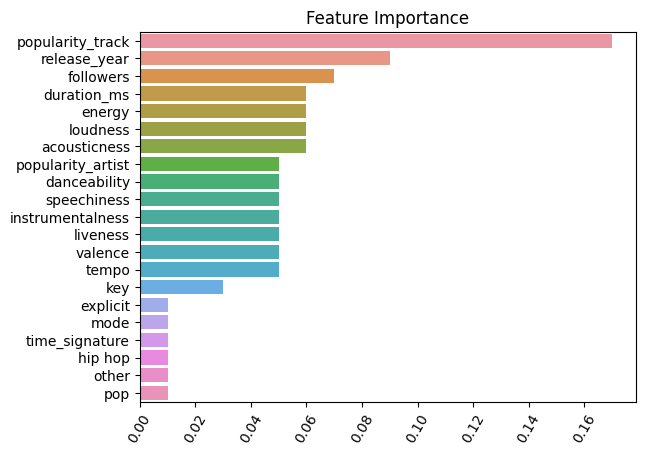

In [120]:
sns.barplot(x = importance[:21], y = feature[:21])
plt.xticks(rotation=60)
plt.title('Feature Importance')
plt.show()

This plot shows us how `popularity_track`, `release_year`, and `followers` are the most important features in our Random Forest Model. We intuitively expected that `popularity_track` and `followers` would highly influence the chances of a song getting into the Charts. Yet, for `release_year` and other features like `duration_ms`, `energy`, `acousticness`, etc. their influence is less obvious and can be useful for artists to consider when producing songs (if their goal is to get into the charts).

#Conclusion

We began our investigation by considering the question of inequality of success in the music industry and the potential reasons why some songs are more popular than others. We situated this question within the wider context of cultural markets and examined two potential explanations; the first suggests that the inherent qualities of a song are the best predictors of its popularity, and the other suggests that the popularity is unpredictable and highly determined by social influence. The goal of our project was to utilize data on Spotify tracks, charts, and artists and apply machine learning techniques to try to build a model that predicts the likelihood of a song making it into the charts. 

Before delving into creating models to predict our main variable of interest, `in_chart`, we decided to explore predicting another important variable, the popularity of a track. Our linear regression model to predict `popularity_track`, a variable that is strongly related to the likelihood of making it into the charts, had a moderate $R^2$ value of 40% and a high Mean Squared Error, 253. Despite utilizing techniques such as PCA, Ridge, and Lasso, the MSE remained low, indicating that the popularity of a song is not linear with respect to the audio features we decided to use. This gives support to the possibility that variables such as popularity are difficult to predict and that the qualities of a song, such as its audio features, are unlikely to highly determine its popularity.

However, our results improved as we tried to build a model to predict our primary variable, which is whether or not a song makes it into the charts. By utilizing one-hot encoding and Logistic Regression, our model had an accuracy level of 76%, which is relatively high. Yet, when we instead opted for building a Random Forest model and applied hyperparameter tuning to enhance its depth, our accuracy score increased to 93%. Upon examining the importance of various features and the extent to which they contributed to our model, we realized that no single variable highly predicted the outcome (other than the track popularity, which we know Spotify uses to determine chart rankings). However, a combination of various features, such as the duration, energy, and acousticness had a notable effect on the results. So, our results mostly indicate that while a song’s success might not be largely predictable, certain factors, such as a song’s duration, energy, and acousticness nonetheless play an important role. We could potentially use our model results to make suggestions to artists regarding what audio features are important to keep in mind when getting together with producers and engineers to create chart-worthy songs.

# Challenges/Obstacles Faced

Some metrics from one of the main datasets were confusingly measured. The fact that average speechiness could be around 0 and average instrumentalness could also be around 0 is strange to us. The definitions of these metrics sound as direct opposites, so we expected most songs to have an average score of 0.5 for both of these variables since songs are usually a perfect combination of both vocals and instrumentals, but this was not the case. Therefore, it was a challenge to decipher what to infer from those features.

Understanding the sampling of the charts. We have seen 77 countries with charts, but we were wondering whether the countries that are not represented were not collected by the author of the dataset or Spotify just doesn’t create charts for those countries. This gave us an incomplete look when we were exploring the maps. 


# Potential Next Steps

At some point when cleaning and merging the data, we happened to have created some sort of disparity between the number of songs from each year, where earlier years have more songs included in the dataset over more recent years. The difference is not that substantial yet this could inevitably cause problems in our models as it may inaccurately attribute more importance to a variable like release_year when making predictions or classifications. We also saw an imbalance between tracks that had a value of 1 in_chart versus a value of 0, where songs that have not been in the Spotify Charts were overrepresented, which is expected. If we were to do this project again, we would sample the same proportion of songs per year as well as an equal proportion of in_chart tracks to avoid an imbalance of tracks.

A possible future step could be having 2021-2022 data and seeing how our models work. Since we are working with a 7 year time-frame, we wonder whether it would still work for 2021-2022. From 2014 to 2023, what enters the charts has changed as mentioned in one of the previous articles linked. Therefore, we will need to highly consider how to reflect the music industry change in our models, but also be conscious of not oversampling from one of the years in the time period of the data.
